# Importing necessary libraries:

******************************************************

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

******************************************

# Preprocessing the mesh file:

****************************************************

## We are using the Gmsh to mesh the geometry:
### Gmsh website: https://gmsh.info/
### Reference to Gmsh file formats: https://gmsh.info/doc/texinfo/gmsh.html#Gmsh-file-formats

### NOTE: Enable save all nodes option while saving the mesh file

## Reading the contents of mesh file

In [4]:
# Mesh_File should be the name of the Gmsh file which is to be used
Mesh_File = "mesh.msh"

In [5]:
def Mesh_String_Extractor(mesh_file_content,Start,End):
    """
    Input: 
    mesh_file_content: Content of the mesh file as string
    Start: Start of the string to be extracted, excluding Start
    End: End of the string to be extracted, excluding End
    
    Output:
    Mesh_String: Content of the mesh file between Start and End
    
    Description:
    Extracting the string between Start and End in the string mesh_file_content
    """
    
    # Acquiring the index of Start
    Mesh_Start_index = mesh_file_content.find(Start)
    
    # Acquiring the index of End
    Mesh_End_index = mesh_file_content.find(End)
    
    # Acquiring the content between Start and End
    Mesh_String = mesh_file_content[Mesh_Start_index + len(Start)+1:Mesh_End_index-1]
    
    return Mesh_String

In [6]:
def Mesh_Format(Mesh_File):
    """
    Input: 
    mesh_file: Path to the mesh file
    
    Output:
    Mesh_Ascii_Format: Ascii Format of the mesh file
    Mesh_File_Type: 0 for ASCII mode, 1 for binary mode
    Mesh_Data_Size_Native: Data-size in the mesh_file
    
    Description:
    Extracting the mesh file format
    """
    
    # Reading the mesh file
    mesh_file = open(Mesh_File,"r")
    
    # Creating the string of the entire mesh file
    mesh_file_content = mesh_file.read()
    
    # Closing the mesh file
    mesh_file.close()
    
    # Extracting the mesh format
    Start = "$MeshFormat"
    End = "$EndMeshFormat"
    Mesh_Format_string = Mesh_String_Extractor(mesh_file_content,Start,End)
    
    # Mesh_Format_string: Ascii Format of the mesh file
    Mesh_Ascii_Format = float(Mesh_Format_string.split(sep=" ")[0])
    
    # Mesh_File_Type: 0 for ASCII mode, 1 for binary mode
    Mesh_File_Type = int(Mesh_Format_string.split(sep=" ")[1])
    
    # Mesh_Data_Size_Native: Data-size in the mesh_file
    Mesh_Data_Size_Native = int(Mesh_Format_string.split(sep=" ")[2])
    
    return Mesh_Ascii_Format, Mesh_File_Type, Mesh_Data_Size_Native

In [7]:
# Mesh file format
Mesh_Format(Mesh_File)

(4.1, 0, 8)

In [8]:
def Mesh_Physical_Names(Mesh_File):
    """
    Input: 
    Mesh_File: Path to the mesh file
    
    Output:
    Physical_Tags_Dimension_Array[Physical_Tag,Dimension]
    Physical_Tags_Name[Physical_Tag_Name]
    
    Description:
    Extracting the physical names in the mesh
    
    NOTE:
    This function will be used in future
    """
    
    # Reading the mesh file
    mesh_file = open(Mesh_File,"r")
    
    # Creating the string of the entire mesh file
    mesh_file_content = mesh_file.read()
    
    # Closing the mesh file
    mesh_file.close()
    
    # Extracting the physical names
    Start = "$PhysicalNames"
    End = "$EndPhysicalNames"
    Mesh_String = Mesh_String_Extractor(mesh_file_content,Start,End)
    
    # Extracting the lines
    Lines = Mesh_String.split(sep="\n")
    
    # Extracting the number of the lines
    num_Physical_Names = int(Lines[0])
    
    # Memory Allocation
    # Physical_Tags_Dimension_Array: 
    # Physical_Tags_Dimension_Array[Physical_Tag,Dimension]
    Physical_Tags_Dimension_Array = np.zeros((num_Physical_Names,2),dtype=int)
    # Physical_Tags_Name[Physical_Tag_Name]
    Physical_Tags_Name = np.empty(num_Physical_Names,dtype = object)
    
    # Populating the arrays
    for i in range(1,num_Physical_Names+1):
        
        # Debugging Script:
        # print(i)
        # dimension = int(Lines[i].split(" ")[0])
        # Physical_Tag = int(Lines[i].split(" ")[1])
        # Physical_Tag_Name = Lines[i].split(" ")[2][1:-1]
        # print(Physical_Tag_Name)
        
        Physical_Tags_Dimension_Array[i-1,0] = int(Lines[i].split(" ")[0])
        Physical_Tags_Dimension_Array[i-1,1] = int(Lines[i].split(" ")[1])
        Physical_Tags_Name[i-1] = Lines[i].split(" ")[2][1:-1]
    
    return Physical_Tags_Dimension_Array, Physical_Tags_Name

In [9]:
# Physical names in the mesh file
Mesh_Physical_Names(Mesh_File)

(array([[1, 5],
        [1, 6],
        [1, 7],
        [1, 8]]),
 array(['RIGHT', 'TOP', 'LEFT', 'BOTTOM'], dtype=object))

In [10]:
def Mesh_Entities(Mesh_File):
    """
    Input: 
    Mesh_File: Path to the mesh file
    
    Output:
    Point_Data: [pointTag(int),X(double),Y(double),Z(double),numPhysicalTags(size_t),physicalTag(int)]
    Curve_Data: [curveTag(int),minX(double),minY(double),minZ(double),maxX(double),maxY(double),maxZ(double),numPhysicalTags(size_t),physicalTag(int),numBoundingPoints(size_t),pointTag]
    Surface_Data: [surfaceTag(int),minX(double),minY(double),minZ(double),maxX(double),maxY(double),maxZ(double),numPhysicalTags(size_t),physicalTag(int),numBoundingCurves(size_t),curveTag]
    Volume_Data: [volumeTag(int),minX(double),minY(double),minZ(double),maxX(double),maxY(double),maxZ(double),numPhysicalTags(size_t),physicalTag(int),numBoundngSurfaces(size_t),surfaceTag]
    
    Description:
    Extracting the data about different types of entities in the mesh 
    """
    
    # Reading the mesh file
    mesh_file = open(Mesh_File,"r")
    
    # Creating the string of the entire mesh file
    mesh_file_content = mesh_file.read()
    
    # Closing the mesh file
    mesh_file.close()
    
    # Extracting the Entities
    Start = "$Entities"
    End = "$EndEntities"
    Mesh_String = Mesh_String_Extractor(mesh_file_content,Start,End)
    
    # Extracting the lines
    Lines = Mesh_String.split(sep="\n")
    
    num_Mesh_Points = int(Lines[0].split(" ")[0])
    num_Mesh_Curves = int(Lines[0].split(" ")[1])
    num_Mesh_Surfaces = int(Lines[0].split(" ")[2])
    num_Mesh_Volumes = int(Lines[0].split(" ")[3])
    
    # Memory allocation
    Point_Attributes = len(Lines[1:num_Mesh_Points+1][0].split(" "))
    Point_Data = np.zeros((num_Mesh_Points,Point_Attributes))
    
    # Populating the Points_Data
    for i in range(1,num_Mesh_Points+1):
    # Make this True if you are using Physical Tags for the points
        Point_Pysical_Tags = False
        if Point_Pysical_Tags == False:
            # print(Lines[1:num_Mesh_Points+1][i-1])
            Point_Data[i-1][:Point_Attributes-1] = Lines[1:num_Mesh_Points+1][i-1].split(" ")[:Point_Attributes-1]
        else:
            Point_Data[i-1] = Lines[1:num_Mesh_Points+1][i-1].split(" ")
    
    # Memory allocation
    Curve_Attributes = len(Lines[num_Mesh_Points+1:num_Mesh_Points+num_Mesh_Curves+1][0].split(" "))
    Curve_Data = np.zeros((num_Mesh_Curves,Curve_Attributes))

    # Populating the Curve_Data
    for i in range(1,num_Mesh_Curves+1):
        # Make this True if you are using Physical Tags for the points
        Point_Pysical_Tags = False
        if Point_Pysical_Tags == False:
            Curve_Data[i-1][:Curve_Attributes-1] = Lines[num_Mesh_Points+1:num_Mesh_Points+num_Mesh_Curves+1][i-1].split(" ")[:Curve_Attributes-1]
        else:
            Curve_Data[i-1] = Lines[num_Mesh_Points+1:num_Mesh_Points+num_Mesh_Curves+1][i-1].split(" ")
    
    # Memory allocation
    Surface_Attributes = len(Lines[num_Mesh_Points+num_Mesh_Curves+1:num_Mesh_Points+num_Mesh_Curves+num_Mesh_Surfaces+1][0].split(" "))
    Surface_Data = np.zeros((num_Mesh_Surfaces,Surface_Attributes))

    # Populating the Surface_Data
    for i in range(1,num_Mesh_Surfaces+1):
        # Make this True if you are using Physical Tags for the points
        Point_Pysical_Tags = False
        if Point_Pysical_Tags == False:
            Surface_Data[i-1][:Surface_Attributes-1] = Lines[num_Mesh_Points+num_Mesh_Curves+1:num_Mesh_Points+num_Mesh_Curves+num_Mesh_Surfaces+1][i-1].split(" ")[:Surface_Attributes-1]
        else:
            Surface_Data[i-1] = Lines[num_Mesh_Points+num_Mesh_Curves+1:num_Mesh_Points+num_Mesh_Curves+num_Mesh_Surfaces+1][i-1].split(" ")

    if num_Mesh_Volumes == 0:
        Volume_Data = 0
    else:
        # Memory Allocation
        Volume_Attributes = len(Lines[num_Mesh_Points+num_Mesh_Curves+num_Mesh_Surfaces+1:num_Mesh_Points+num_Mesh_Curves+num_Mesh_Surfaces+num_Mesh_Volumes+1][0].split(" "))
        Volume_Data = np.zeros((num_Mesh_Volumes,Volume_Attributes))

        # Populating the Curve_Data
        for i in range(1,num_Mesh_Volumes+1):
            # Make this True if you are using Physical Tags for the points
            Point_Pysical_Tags = False
            if Point_Pysical_Tags == False:
                Volume_Data[i-1][:Volume_Attributes-1] = Lines[num_Mesh_Points+num_Mesh_Curves+num_Mesh_Surfaces+1:num_Mesh_Points+num_Mesh_Curves+num_Mesh_Surfaces+num_Mesh_Volumes+1][i-1].split(" ")[:Volume_Attributes-1]
            else:
                Volume_Data[i-1] = Lines[num_Mesh_Points+num_Mesh_Curves+num_Mesh_Surfaces+1:num_Mesh_Points+num_Mesh_Curves+num_Mesh_Surfaces+num_Mesh_Volumes+1][i-1].split(" ")

    return Point_Data,Curve_Data,Surface_Data,Volume_Data

In [11]:
def Mesh_Nodes(Mesh_File):
    """
    Input: 
    Mesh_File: Path to the mesh file
    
    Output:
    Point_Data: [pointTag(int),X(double),Y(double),Z(double),numPhysicalTags(size_t),physicalTag(int)]
    Curve_Data: [curveTag(int),minX(double),minY(double),minZ(double),maxX(double),maxY(double),maxZ(double),numPhysicalTags(size_t),physicalTag(int),numBoundingPoints(size_t),pointTag]
    Surface_Data: [surfaceTag(int),minX(double),minY(double),minZ(double),maxX(double),maxY(double),maxZ(double),numPhysicalTags(size_t),physicalTag(int),numBoundingCurves(size_t),curveTag]
    Volume_Data: [volumeTag(int),minX(double),minY(double),minZ(double),maxX(double),maxY(double),maxZ(double),numPhysicalTags(size_t),physicalTag(int),numBoundngSurfaces(size_t),surfaceTag]
    
    Description:
    Extracting different types of mesh nodes in the mesh
    """
    
    # Reading the mesh file
    mesh_file = open(Mesh_File,"r")
    
    # Creating the string of the entire mesh file
    mesh_file_content = mesh_file.read()
    
    # Closing the mesh file
    mesh_file.close()
    
    # Extracting the Entities
    Start = "$Entities"
    End = "$EndEntities"
    Mesh_String = Mesh_String_Extractor(mesh_file_content,Start,End)
    
    # Extracting the lines
    Lines = Mesh_String.split(sep="\n")
    
    num_Mesh_Points = int(Lines[0].split(" ")[0])
    num_Mesh_Curves = int(Lines[0].split(" ")[1])
    num_Mesh_Surfaces = int(Lines[0].split(" ")[2])
    num_Mesh_Volumes = int(Lines[0].split(" ")[3])
    
    # Extracting the Nodes
    Start = "$Nodes"
    End = "$EndNodes"
    Mesh_String = Mesh_String_Extractor(mesh_file_content,Start,End)
    
    # Extracting the lines
    Lines = Mesh_String.split(sep="\n")
    
    num_Entity_Blocks = int(Lines[0].split(" ")[0])
    num_Nodes = int(Lines[0].split(" ")[1])
    min_Node_Tag = int(Lines[0].split(" ")[2])
    max_Node_Tag = int(Lines[0].split(" ")[3])
    
    # Memory allocation
    Node_Coordinates = np.zeros((num_Nodes,3))
    
    # Storing the coordinates of all the nodes
    # The index of the array is the (Node_Tag - 1)
    for i in range(1,len(Lines[1:])):
        # Description Line
        # entityDim(int),entityTag(int),parametric(int; 0 or 1),numNodesInBlock(size_t),nodeTag(size_t)
        if len(Lines[i].split()) == 4:
            # print(Lines[i].split(" "))
            temp = int(Lines[i].split(" ")[-1])
            for j in range(i+1,temp+i+1):
                Node_Tag = int(Lines[j])
                Node_Coordinates[Node_Tag-1][:] = Lines[temp + j].split(" ")
                # print(Lines[j])
            i = i+(2*temp)
    
    # Memory allocation
    Point_Nodes = np.zeros((num_Mesh_Points,1))
    Curve_Nodes = np.empty(num_Mesh_Curves,dtype = object)
    Surface_Nodes = np.empty(num_Mesh_Surfaces,dtype = object)
    
    # Storing the nodes in the different entities (Points, Curves and Surfaces)
    # The index of the arrays are the (Tag - 1) and the list output is the list of the node in that entity
    for i in range(1,len(Lines[1:])):
        # Description Line
        # entityDim(int),entityTag(int),parametric(int; 0 or 1),numNodesInBlock(size_t),nodeTag(size_t)
        if len(Lines[i].split()) == 4:
            # print(Lines[i].split(" "))
            temp = int(Lines[i].split(" ")[0])
            if temp == 0:
                temp_1 = int(Lines[i].split(" ")[1])
                Point_Nodes[temp_1 - 1] = int(Lines[i+1].split(" ")[0]) - 1
            if temp == 1:
                temp_2 = int(Lines[i].split(" ")[-1])
                Curve_List = []
                for j in range(0,temp_2):
                    Curve_List.append(int(Lines[i+j+1].split(" ")[0])-1)
                temp_1 = int(Lines[i].split(" ")[1])
                Curve_Nodes[temp_1 - 1] = Curve_List
            if temp == 2:
                temp_2 = int(Lines[i].split(" ")[-1])
                Surface_List = []
                for j in range(0,temp_2):
                    Surface_List.append(int(Lines[i+j+1].split(" ")[0])-1)
                temp_1 = int(Lines[i].split(" ")[1])
                Surface_Nodes[temp_1 - 1] = Surface_List
            i = i+(2*temp)
    
    return Node_Coordinates,Point_Nodes,Curve_Nodes,Surface_Nodes

In [12]:
def Mesh_Elements(Mesh_File):
    """
    Input: 
    Mesh_File: Path to the mesh file
    
    Output:
    Element_Nodes: [X,Y,Z,Element Type]
    Index is the (Element_Tag -1)
    
    Description:
    This will contain different types of elements in 0D, 1D, 2D and 3D
    """
    
    # Reading the mesh file
    mesh_file = open(Mesh_File,"r")

    # Creating the string of the entire mesh file
    mesh_file_content = mesh_file.read()

    # Closing the mesh file
    mesh_file.close()

    # Extracting the Elements
    Start = "$Elements"
    End = "$EndElements"
    Mesh_String = Mesh_String_Extractor(mesh_file_content,Start,End)

    # Extracting the lines
    Lines = Mesh_String.split(sep="\n")

    num_Entity_Blocks = int(Lines[0].split(" ")[0])
    num_Elements = int(Lines[0].split(" ")[1])
    min_Element_Tag = int(Lines[0].split(" ")[2])
    max_Element_Tag = int(Lines[0].split(" ")[3])
    
    # Memory allocation
    Element_Nodes = np.zeros((num_Elements,4),dtype = int)

    for i in range(1,len(Lines[1:])):
        # print(Lines[i].split())
        if len(Lines[i].split()) == 4:
            if int(Lines[i].split()[0]) <= 3:
                # print(Lines[i])
                for j in range(i+1,i+1+int(Lines[i].split()[-1])):
                    # print(Lines[j])
                    index = int(Lines[j].split()[0])
                    if len(Lines[j].split()) == 2:
                        Element_Nodes[index-1,-1] = Lines[i].split()[0]
                        Element_Nodes[index-1,0] = Lines[j].split()[1]
                        Element_Nodes[index-1,0] = Element_Nodes[index-1,0] - 1
                    if len(Lines[j].split()) == 3:
                        Element_Nodes[index-1,-1] = Lines[i].split()[0]
                        Element_Nodes[index-1,0:2] = Lines[j].split()[1:]
                        Element_Nodes[index-1,0:2] = Element_Nodes[index-1,0:2] - 1
                    if len(Lines[j].split()) == 4:
                        Element_Nodes[index-1,-1] = Lines[i].split()[0]
                        Element_Nodes[index-1,0:3] = Lines[j].split()[1:]
                        Element_Nodes[index-1,0:3] = Element_Nodes[index-1,0:3] - 1
                        
    return Element_Nodes

In [13]:
# Mesh Elements
Mesh_Elements_Data = Mesh_Elements(Mesh_File)

In [14]:
# This will count the number of triangles in the mesh
Num_Triangles = np.count_nonzero(Mesh_Elements_Data[:,-1] == 2)

In [15]:
def Element_Node_Connectivity_Calculate(Num_Triangles,Mesh_Elements_Data):
    """
    Input:
    Num_Triangles: Number of triangles
    Mesh_Elements_Data: Mesh Elements Data (Previously Extracted)
    
    Output:
    Element Node Connectivity: Format: [Element, Node1, Node2, Node3]
    """
    
    # Memory allocation
    # Format: [Element, Node1, Node2, Node3]
    Element_Node_Connectivity = np.zeros((Num_Triangles,4))
    
    #  This a counter
    j = 0
    
    # Looping over all type of mesh elements in the mesh
    for i in range(Mesh_Elements_Data.shape[0]):
        
        # Only triangle mesh elements will be considered
        if Mesh_Elements_Data[i,-1] == 2:
            # Element is stored
            Element_Node_Connectivity[j,0] = i
            # Nodes are stored
            Element_Node_Connectivity[j,1:] = Mesh_Elements_Data[i,:3]
            j = j+1
    
    return Element_Node_Connectivity

In [16]:
Element_Node_Connectivity = Element_Node_Connectivity_Calculate(Num_Triangles,Mesh_Elements_Data)

In [17]:
def Edge_Node_Connectivity_Calculate(Element_Node_Connectivity,Mesh_Elements_Data):
    """
    Input:
    Element_Node_Connectivity: Element Node Connectivity (Previously Extracted)
    Mesh_Elements_Data: Mesh Elements Data (Previously Extracted)
    
    Output:
    Edge_Node_Connectivity: Format: [Edge, Node1, Node2]
    Boundary_Edges: [Edge]
    
    Description:
    This function calculates edge node connectivity
    
    NOTE:
    This function also returns boundary edges
    """
    
    # List to store edge node connectivity
    Edge_Node_Connectivity = []
    
    # List to store boundary edges
    Boundary_Edges = []
    
    # Edges inside the domain
    Edge_num = 0
    for i in range(Element_Node_Connectivity.shape[0]):
        Element = Element_Node_Connectivity[i][0]
        Nodes = Element_Node_Connectivity[i][1:]
        for j in range(i+1,Element_Node_Connectivity.shape[0]):
            element = Element_Node_Connectivity[j][0]
            nodes = Element_Node_Connectivity[j][1:]
            value = np.isin(Nodes,nodes).sum()
            temp = []
            if value == 2:
                if Element != element:
                    temp_node = np.intersect1d(Nodes,nodes)
                    temp_node = np.sort(temp_node)
                    
                    # Debugging Script:
                    # print(Nodes)
                    # print(nodes)
                    # print(element)
                    # print(Element)
                    
                    temp.append(Edge_num)
                    temp.append(temp_node[0])
                    temp.append(temp_node[1])
                    Edge_Node_Connectivity.append(temp)
                    Edge_num = Edge_num + 1

    # Edges at the boundary
    for i in range(Mesh_Elements_Data.shape[0]):
        if Mesh_Elements_Data[i,-1] == 1:
            temp = []
            temp.append(Edge_num)
            temp_node = Mesh_Elements_Data[i][0:2]
            temp_node = np.sort(temp_node)        
            temp.append(temp_node[0])
            temp.append(temp_node[1])
            Edge_Node_Connectivity.append(temp)
            Boundary_Edges.append(Edge_num)
            Edge_num = Edge_num + 1
            
            # Debugging Script:
            # print(temp)
            # print(np.isin(Nodes,nodes).sum())
            
    Edge_Node_Connectivity = np.array(Edge_Node_Connectivity)
    Boundary_Edges = np.array(Boundary_Edges)
    return Edge_Node_Connectivity,Boundary_Edges

In [18]:
Edge_Node_Connectivity,Boundary_Edges = Edge_Node_Connectivity_Calculate(Element_Node_Connectivity,Mesh_Elements_Data)

In [19]:
def Element_Edge_Connectivity_Calculate(Num_Triangles,Element_Node_Connectivity,Edge_Node_Connectivity):
    """
    Input: 
    Num_Triangles: Number of triangles
    Element_Node_Connectivity: Element Node Connectivity (Previously Calculated)
    Edge_Node_Connectivity: Edge Node Connectivity (Previously Calculated)
    
    Output:
    Element_Edge_Connectivity: Element Edge Connectivity
    """
    # Memory allocation
    Element_Edge_Connectivity = np.zeros((Num_Triangles,4))

    for i in range(Element_Node_Connectivity.shape[0]):
        Element = Element_Node_Connectivity[i][0]
        Nodes = Element_Node_Connectivity[i][1:]
        Element_Edge_Connectivity[i,0] = Element
        # print(Element)
        ctr = 1
        for j in range(Edge_Node_Connectivity.shape[0]):
            edge = Edge_Node_Connectivity[j][0]
            node_1 = Edge_Node_Connectivity[j][1]
            node_2 = Edge_Node_Connectivity[j][2]
            nodes = Edge_Node_Connectivity[j][1:]
            value = np.isin(Nodes,nodes).sum()
            temp = []
            if value == 2:
                Element_Edge_Connectivity[i,ctr] = edge
                ctr = ctr + 1
                
    return Element_Edge_Connectivity

In [20]:
Element_Edge_Connectivity = Element_Edge_Connectivity_Calculate(Num_Triangles,Element_Node_Connectivity,Edge_Node_Connectivity)

In [21]:
Node_Coordinates,Point_Nodes,Curve_Nodes,Surface_Nodes = Mesh_Nodes(Mesh_File)

In [22]:
def Plot_Nodes(Node_Coordinates,Marker):
    """
    Input: 
    Node_Coordinates: Node Coordinates (Previously Calculated)
    Marker: Marker for each of the nodes
    
    Output:
    Plots the nodes of the elements
    """
    x = Node_Coordinates[:,0]
    y = Node_Coordinates[:,1]
    plt.plot(x,y,Marker)
    plt.axis('scaled')
    plt.show()

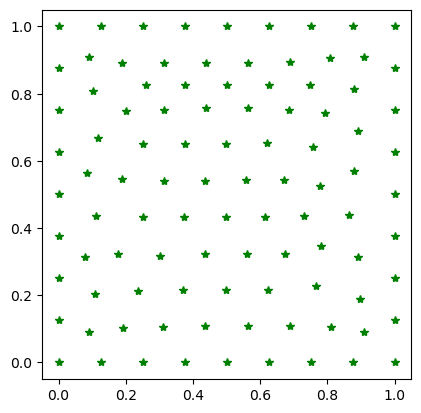

In [23]:
Plot_Nodes(Node_Coordinates,"g*")

In [24]:
def Plot_Edges(Element_Node_Connectivity,Node_Coordinates):
    """
    Input: 
    Element_Node_Connectivity: Element Node Connectivity (Previously Calculated)
    Node_Coordinates: Node Coordinates (Previously Calculated)
    
    Output:
    Plots the edges in the domain
    """
    temp = np.zeros((4,2))
    x = Node_Coordinates[:,0]
    y = Node_Coordinates[:,1]
    for i in range(Element_Node_Connectivity.shape[0]):
        Nodes = Element_Node_Connectivity[i,1:]
        Nodes = np.array(Nodes,dtype = int)
        temp[:3,0] = x[Nodes]
        temp[:3,1] = y[Nodes]
        temp[-1,0] = x[Nodes[0]]
        temp[-1,1] = y[Nodes[0]]
        X = temp[:,0]
        Y = temp[:,1]
        plt.plot(X,Y)
        # plt.plot(x[Nodes[0]],y[Nodes[0]],"-b*")
    plt.axis('scaled')
    plt.show()

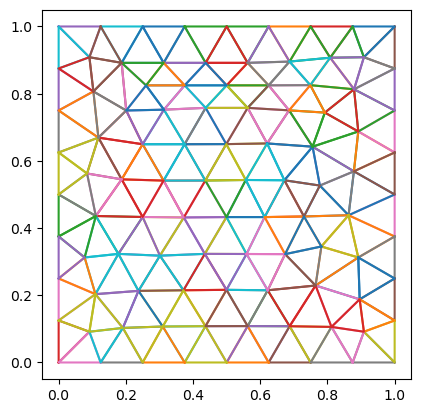

In [25]:
Plot_Edges(Element_Node_Connectivity,Node_Coordinates)

In [26]:
def Element_Element_Connectivity_Calculate(Num_Triangles,Element_Node_Connectivity):
    """
    Input:
    Num_Triangles: Number of Triangles
    Element_Node_Connectivity: Element Node Connectivity (Previously Calculated)
    
    Output:
    Element_Element_Connectivity: Format [Element, Nb_Element_1, Nb_Element_2, Nb_Element_3]
    """
    
    Element_Element_Connectivity = np.zeros((Num_Triangles,4),dtype = int)

    Edge_num = 0
    for i in range(Element_Node_Connectivity.shape[0]):
        Element = Element_Node_Connectivity[i][0]
        # This is where all the entries are made equal to the original element
        Element_Element_Connectivity[i] = Element
        Nodes = Element_Node_Connectivity[i][1:]
        ctr = 1
        for j in range(Element_Node_Connectivity.shape[0]):
            element = Element_Node_Connectivity[j][0]
            nodes = Element_Node_Connectivity[j][1:]
            value = np.isin(Nodes,nodes).sum()
            if value == 2:
                if Element != element:
                    # print(Element)
                    # print(element)
                    Element_Element_Connectivity[i][ctr] =  element
                    ctr = ctr + 1
        
        # Debug Script
        # print(ctr)
        # if ctr == 3:
            # print(Element_Element_Connectivity[i][:])
            
    return Element_Element_Connectivity

In [27]:
Element_Element_Connectivity = Element_Element_Connectivity_Calculate(Num_Triangles,Element_Node_Connectivity)

### We need to renumber the elements

In [28]:
def Renumbering(Element_Element_Connectivity,Element_Edge_Connectivity,Element_Node_Connectivity,Edge_Node_Connectivity):
    # Renumbering
    Element_Element_Connectivity_new = Element_Element_Connectivity - np.min(Element_Element_Connectivity)

    # Renumbering
    Element_Edge_Connectivity_new = Element_Edge_Connectivity
    Element_Edge_Connectivity_new[:,0] = Element_Edge_Connectivity_new[:,0] - np.min(Element_Edge_Connectivity_new[:,0])

    # Renumbering
    Element_Node_Connectivity_new = Element_Node_Connectivity

    # Renumbering
    Element_Node_Connectivity_new[:,0] = Element_Node_Connectivity_new[:,0] - np.min(Element_Node_Connectivity_new[:,0])

    # Renumbering
    Edge_Node_Connectivity_new = Edge_Node_Connectivity 
    
    return Element_Element_Connectivity_new,Element_Edge_Connectivity_new,Element_Node_Connectivity_new,Edge_Node_Connectivity_new

In [29]:
Element_Element_Connectivity_new,Element_Edge_Connectivity_new,Element_Node_Connectivity_new,Edge_Node_Connectivity_new = Renumbering(Element_Element_Connectivity,Element_Edge_Connectivity,Element_Node_Connectivity,Edge_Node_Connectivity)

In [30]:
def Face_Centroid_Calculate(Edge_Node_Connectivity_new,Node_Coordinates):
    """
    Input: 
    Edge_Node_Connectivity_new: Edge Node Connectivity renumbered
    Node_Coordinates: Node Coordinates (Previously Calculated)
    
    Output:
    Face_Centroid: Format: [Edge,centroid x, centroid y]
    """
    
    # Memory allocation
    Face_Centroid = np.zeros((Edge_Node_Connectivity_new.shape[0],3))
    
    # Converting the 3D coordinates to 2D coordinates
    Node_Coordinates_2D = Node_Coordinates[:,:2]
    
    for i in range(Edge_Node_Connectivity_new.shape[0]):
        Face_Centroid[i,0] = Edge_Node_Connectivity[i,0]
        Nodes = Edge_Node_Connectivity_new[i,1:]
        # print(Nodes)
        temp = 0
        for node in Nodes:
            temp = temp + Node_Coordinates_2D[int(node)]
        temp = temp*0.5
        Face_Centroid[i,1:] = temp
        
    return Face_Centroid

In [31]:
Face_Centroid = Face_Centroid_Calculate(Edge_Node_Connectivity_new,Node_Coordinates)

In [32]:
def Plot_Mesh_with_Face_Centroid(Node_Coordinates,Element_Node_Connectivity,Face_Centroid,Marker,Markersize):
    """
    Input:
    Node_Coordinates: Node Coordinates (Previously Calculated)
    Element_Node_Connectivity: Element Node Connectivity (Previously Calculated)
    Face_Centroid: Face Centroid (Previously Calculated)
    Marker: Marker for the face centroid
    Markersize: Marker size of the face centroid
    
    Output:
    This function plots mesh with face centroid
    """
    temp = np.zeros((4,2))
    x = Node_Coordinates[:,0]
    y = Node_Coordinates[:,1]
    for i in range(Element_Node_Connectivity.shape[0]):
        Nodes = Element_Node_Connectivity[i,1:]
        Nodes = np.array(Nodes,dtype = int)
        temp[:3,0] = x[Nodes]
        temp[:3,1] = y[Nodes]
        temp[-1,0] = x[Nodes[0]]
        temp[-1,1] = y[Nodes[0]]
        X = temp[:,0]
        Y = temp[:,1]
        plt.plot(X,Y)
        # plt.plot(x[Nodes[0]],y[Nodes[0]],"-b*")
    plt.plot(Face_Centroid[:,1],Face_Centroid[:,2],Marker,markersize=Markersize)
    plt.axis('scaled')
    plt.show()
    

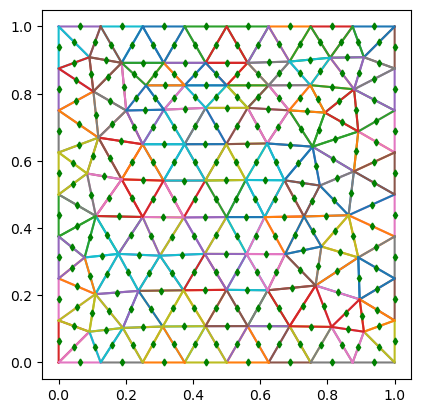

In [33]:
Plot_Mesh_with_Face_Centroid(Node_Coordinates,Element_Node_Connectivity,Face_Centroid,"gd",3.5)

In [34]:
# Number of vertices in each element
Num_vertices = 3

In [35]:
# Dimension of the problem
dim = 2

In [36]:
def Anti_Clock_Triangle_vertices(vertices):
    """
    Input:
    vertices: These are the coordinates of the vertices of an element
    
    Output:
    new_vertices: These are the coordinates of the vertices of the same element arranged in anticlock-wise fashion
    
    NOTE:
    This is requied because while using Gauss divergence theorem we need to take the integral over the surface in the outward direction
    """
    
    new_vertices = np.zeros(vertices.shape)
    Num_vertices = vertices.shape[0]
    dim = 2
    Initial_vertex = vertices[0,:]
    vec_1 = Initial_vertex - vertices[1,:]
    vec_2 = Initial_vertex - vertices[2,:]
    sign = np.cross(vec_1,vec_2)
    if sign < 0:
        new_vertices[0,:] = Initial_vertex
        temp = vertices[1,:]
        new_vertices[1,:] = vertices[2,:]
        new_vertices[2,:] = temp
    else:
        new_vertices = vertices
    return new_vertices

In [37]:
def Calculate_Face_Centroid(Anticlock_vertices):
    """
    Input: 
    Anticlock_vertices: Vertices of an element in the anticlock-wise direction
    
    Output:
    Centroid of the same vertices of the same element arranged in anticlock-wise fashion
    
    NOTE: 
    This is different from Face_Centroid_Calculate(Edge_Node_Connectivity_new,Node_Coordinates) function.
    Here, face centroid is arranged in the anticlock-wise fashion.
    """
    
    Num_vertices = Anticlock_vertices.shape[0]
    dim = Anticlock_vertices.shape[1]
    face_centroid = np.zeros((Num_vertices,dim))
    for i in range(Num_vertices):
        if i == (Num_vertices - 1):
            face_centroid[i,:] = (Anticlock_vertices[0] + Anticlock_vertices[i])*0.5
        else:
            face_centroid[i,:] = (Anticlock_vertices[i] + Anticlock_vertices[i+1])*0.5
    return face_centroid

In [38]:
def Anti_Clock_Edge_Vectors(Anticlock_vertices):
    """
    Input: 
    Anticlock_vertices: Vertices of an element in the anticlock-wise direction
    
    Output:
    Edge_vectors: Vectors along the edges of the same element such that they are along the anticlock wise direction
    Edge_vectors: Format: [x,y]
    """
    
    Num_vertices = Anticlock_vertices.shape[0]
    dim = Anticlock_vertices.shape[1]
    Edge_vectors = np.zeros((Num_vertices,dim))
    for i in range(Num_vertices):
        if i == (Num_vertices - 1):
            Edge_vectors[i,:] = Anticlock_vertices[0,:] - Anticlock_vertices[i,:]
        else:
            Edge_vectors[i,:] = Anticlock_vertices[i+1,:] - Anticlock_vertices[i,:]
    return Edge_vectors

In [39]:
def AntiClock_Edges_local(Anticlock_vertices,Node_Coordinates,Edge_Node_Connectivity_new):
    """
    Input:
    Anticlock_vertices: Vertices of an element aligned in anticlock-wise fashion
    Node_Coordinates_2D: Node Coordinates 2D (Previously Calculated)
    Edge_Node_Connectivity_new: Edge Node Connectivity new (Previously Calculated)
    
    Output:
    Anticlock_Edges: Arrange the edges of the same element in the anticlock-wise fashion locally.
    """
    
    Num_vertices = 3
    Anticlock_nodes = np.zeros((Num_vertices,1))
    
    # Converting the 3D coordinates to 2D coordinates
    Node_Coordinates_2D = Node_Coordinates[:,:2]
    
    ctr = 0
    for vertices in Anticlock_vertices:
        node = 0
        for coordinates in Node_Coordinates_2D:
            if (vertices == coordinates).all():
                Anticlock_nodes[ctr,0] = node
            node = node + 1
        ctr = ctr + 1
    Anticlock_Edges = np.zeros((Num_vertices,1))
    for k in range(Anticlock_nodes.shape[0]):
        if k == (Anticlock_nodes.shape[0] - 1):
            node = Anticlock_nodes[k,0]
            node_1 = Anticlock_nodes[0,0]
        else:
            node = Anticlock_nodes[k,0]
            node_1 = Anticlock_nodes[k+1,0]
        if np.argwhere(np.sum(Edge_Node_Connectivity_new[:,1:] == [node,node_1],axis=1) == 2).shape == (0,1):
            Edge_nodes = Edge_Node_Connectivity_new[np.argwhere(np.sum(Edge_Node_Connectivity_new[:,1:] == [node_1,node],axis=1) == 2)[0,0]]
        else:
            Edge_nodes = Edge_Node_Connectivity_new[np.argwhere(np.sum(Edge_Node_Connectivity_new[:,1:] == [node,node_1],axis=1) == 2)[0,0]]
        Anticlock_Edges[k] = Edge_nodes[0]
    return Anticlock_Edges

In [40]:
def Element_Wise_Plotter(Anticlock_vertices,face_centroid,centroid):
    """
    Input:
    Anticlock_vertices: Vertices of an element in the anticlock-wise fashion
    face_centroid: Centroid of the faces of the same element in the anticlock-wise fashion
    centroid: Centroid of the element
    
    Output:
    Plots one element locally
    """
    
    Num_vertices = 3
    dim = 2
    for i in range(Num_vertices):
        plt.plot(Anticlock_vertices[i,0],Anticlock_vertices[i,1],"d",label = f"v: {i}")
    for i in range(Num_vertices):
        plt.plot(face_centroid[i,0],face_centroid[i,1],"d",label = f"cen: {i}")
    plt.plot(centroid[0],centroid[1],"kd")
    plt.legend()
    plt.axis('scaled')
    plt.show()

In [41]:
def Element_all_prop(vertices,Node_Coordinates,Edge_Node_Connectivity_new):
    """
    Inputs: 
    vertices: Vertices of an element
    Node_Coordinates: Node Coordinates (Previously Calculated)
    Edge_Node_Connectivity_new: Edge Node Connectivity new (Previously Calculated)
    
    Outputs:
    centroid: Centroid of the element
    cen_to_face_cen: Centroid to face centroid vectors
    k_p_prime_vec: kp' vector of the fig. 9.19, page 312, chapter 9, the below book
    [Ferziger JH, Perić M, Street RL. Computational methods for fluid dynamics. springer; 2019 Aug 16.]
    [Chapter: 9,Fig. 9.19: On the approximation of diffusion fluxes for arbitrary polyhedral CVs]
    [Page: 312]
    Anticlock_vertices: Vertices of the same element arranged in the anticlock-wise fashion
    Anticlock_Edges: Edges of the same element arranged in the anticlock-wise fashion
    """
    
    Num_vertices = 3
    dim = 2
    
    # Converting the 3D coordinates to 2D coordinates
    Node_Coordinates_2D = Node_Coordinates[:,:2]
    
    centroid = vertices.mean(axis = 0)
    Anticlock_vertices = Anti_Clock_Triangle_vertices(vertices)
    face_centroid = Calculate_Face_Centroid(Anticlock_vertices)
    Edge_vectors = np.zeros((Num_vertices,dim))
    for i in range(Num_vertices):
        if i == (Num_vertices - 1):
            Edge_vectors[i,:] = Anticlock_vertices[0,:] - Anticlock_vertices[i,:]
        else:
            Edge_vectors[i,:] = Anticlock_vertices[i+1,:] - Anticlock_vertices[i,:]
    Anti_clock_edge_vec = Anti_Clock_Edge_Vectors(Anticlock_vertices)
    Edge_perp_vectors = np.zeros((Num_vertices,dim))
    Edge_perp_vectors[:,0] = Anti_clock_edge_vec[:,1]
    Edge_perp_vectors[:,1] = -Anti_clock_edge_vec[:,0]
    cen_to_face_cen = np.zeros((Num_vertices,dim))
    cen_to_face_cen = face_centroid - centroid
    Edge_perp_vectors_out = Edge_perp_vectors.copy()
    for i in range(Num_vertices):
        temp = np.dot(Anti_clock_edge_vec[i],cen_to_face_cen[i])
        # If it is outward then it would be positive
        if temp < 0:
            Edge_perp_vectors_out[i,:] = -Edge_perp_vectors_out[i,:]
    Edge_perp_vectors_out_unit = np.zeros(Edge_perp_vectors_out.shape)
    for i in range(Num_vertices):
        Edge_perp_vectors_out_unit[i] = (Edge_perp_vectors_out[i])/(((Edge_perp_vectors_out[i]**2).sum())**0.5)
    cen_to_face_cen_perp_distance = (cen_to_face_cen*Edge_perp_vectors_out_unit).sum(axis = 1)
    # Assume this for now
    # See this in Peric's book and modify will integrating
    # Page no.: 310
    # Equation: 9.40
    a = cen_to_face_cen_perp_distance
    # We should make a edge wise array for a while integration
    k_p_prime_vec = np.zeros((Num_vertices,2))
    for i in range(Num_vertices):
        k_p_prime_vec[i] = -Edge_perp_vectors_out_unit[i]*a[i]
    p_p_prime_vec = k_p_prime_vec + cen_to_face_cen
    Anticlock_Edges = AntiClock_Edges_local(Anticlock_vertices,Node_Coordinates_2D,Edge_Node_Connectivity_new)
    # This will plot the local element
    # Element_Wise_Plotter(Anticlock_vertices,face_centroid,centroid)
    return centroid,cen_to_face_cen,k_p_prime_vec,Anticlock_vertices,Anticlock_Edges

In [42]:
def Check_Element_all_prop(Element_Node_Connectivity_new,Node_Coordinates,Edge_Node_Connectivity_new):
    """
    Input:
    Element_Node_Connectivity_new: Element Node Connectivity new (Previously Calculated)
    Node_Coordinates_2D: Node Coordinates 2D (Previously Calculated)
    Edge_Node_Connectivity_new: Edge Node Connectivity new (Previously Calculated)
    Output:
    Checks if Element_all_prop if working or not.
    If no error is raised, then it is working properly.
    """
    # Converting the 3D coordinates to 2D coordinates
    Node_Coordinates_2D = Node_Coordinates[:,:2]
    
    for i in range(Element_Node_Connectivity_new.shape[0]):
        Element_Node_Coordinates_l = np.zeros((Num_vertices,dim))
        Nodes = Element_Node_Connectivity_new[i,1:]
        ctr = 0
        for node in Nodes:
            Element_Node_Coordinates_l[ctr,:] = Node_Coordinates_2D[int(node)]
            ctr = ctr +1
        centroid,cen_to_face_cen,k_p_prime_vec,Anticlock_vertices,Anticlock_Edges = Element_all_prop(Element_Node_Coordinates_l,Node_Coordinates_2D,Edge_Node_Connectivity_new)    

In [43]:
Check_Element_all_prop(Element_Node_Connectivity_new,Node_Coordinates,Edge_Node_Connectivity_new)

In [44]:
def Edge_Element_Connectivity_Calculate(Edge_Node_Connectivity_new,Element_Element_Connectivity_new,Element_Edge_Connectivity_new,Boundary_Edges):
    """
    Input:
    Edge_Node_Connectivity_new: Edge Node Connectivity new (Previously Calculated)
    Element_Element_Connectivity_new: Element Element Connectivity new (Previously Calculated)
    Element_Edge_Connectivity_new: Element Edge Connectivity new (Previously Calculated)
    Boundary_Edges: Boundary Edges (Previously Calculated)
    
    Output:
    Edge_Element_Connectivity: Format: [Edge,Element1,Element2]
    """
    
    Num_Edges = Edge_Node_Connectivity_new.shape[0]
    Edge_Element_Connectivity = np.zeros((Num_Edges,3),dtype = int)
    common_edge_set = set()
    ctr = 0
    for i in range(Element_Element_Connectivity_new.shape[0]):
        Element = Element_Element_Connectivity_new[i,0]
        Element_nb = Element_Element_Connectivity_new[i,1:]
        Edges = Element_Edge_Connectivity_new[int(Element),1:]
        # print(Edges)
        for j in range(Element_nb.shape[0]):
            element = int(Element_nb[j])
            if Element != element:
                edges = Element_Edge_Connectivity_new[element,1:]
                # print(edges)
                # print(Element_Element_Connectivity_new[i])
                common_edge = np.intersect1d(Edges,edges)
                # print(common_edge)
                if common_edge[0] in common_edge_set:
                    pass
                else:
                    common_edge_set.add(common_edge[0])
                    Edge_Element_Connectivity[ctr,0] = common_edge
                    Edge_Element_Connectivity[ctr,1] = Element
                    Edge_Element_Connectivity[ctr,2] = element
                    ctr = ctr +1

    for i in range(Element_Edge_Connectivity_new.shape[0]):
        Element = Element_Edge_Connectivity_new[i,0]
        Edges = Element_Edge_Connectivity_new[i,1:]
        common_edge = np.intersect1d(Edges,Boundary_Edges)
        # print(Edges)
        # print(common_edge)
        if len(common_edge) != 0:
            common_edge_set.add(common_edge[0])
            Edge_Element_Connectivity[ctr,0] = common_edge
            Edge_Element_Connectivity[ctr,1] = Element
            Edge_Element_Connectivity[ctr,2] = Element
            ctr = ctr +1
    temp = Edge_Element_Connectivity.copy()
    Edge_Element_Connectivity = temp[np.argsort(temp[:,0])]
    return Edge_Element_Connectivity

In [45]:
Edge_Element_Connectivity = Edge_Element_Connectivity_Calculate(Edge_Node_Connectivity_new,Element_Element_Connectivity_new,Element_Edge_Connectivity_new,Boundary_Edges)

In [46]:
# We only need pp', NkNk' and |p'Nk'| from this data
# Note |p'Nk'| = 2|kp'|
# So, we are storing it in an array of the format
# cell number, edge number, pp'[0], pp'[1], NkNk'[0], NkNk'[1],|p'Nk'|

In [47]:
# We only need pp', NkNk' and |p'Nk'| from this data
# Note |p'Nk'| = 2|kp'|
# So, we are storing it in an array of the format
# cell number, edge number, pp'[0], pp'[1], NkNk'[0], NkNk'[1],|p'Nk'|
# More data needed for advection
# cell number, edge number, pp'[0], pp'[1], NkNk'[0], NkNk'[1],|p'Nk'|,-unit(kp'[0]),-unit(kp'[1])

In [48]:
Diffusion_mesh_data = np.zeros((Num_Triangles*3,9))

In [49]:
Element_cen = np.zeros((Num_Triangles,3))

In [50]:
def Diffusion_mesh_data_Calculate(Num_Triangles,dim,Element_Node_Connectivity_new,Element_Edge_Connectivity_new,Node_Coordinates,Edge_Node_Connectivity_new,Edge_Element_Connectivity):
    """
    Output:
    Diffusion_mesh_data
    Element_cen
    
    # We only need pp', NkNk' and |p'Nk'| from this data
    # Note |p'Nk'| = 2|kp'|
    # So, we are storing it in an array of the format
    # cell number, edge number, pp'[0], pp'[1], NkNk'[0], NkNk'[1],|p'Nk'|
    # More data needed for advection
    # cell number, edge number, pp'[0], pp'[1], NkNk'[0], NkNk'[1],|p'Nk'|,-unit(kp'[0]),-unit(kp'[1])
    """
    Diffusion_mesh_data = np.zeros((Num_Triangles*3,9))
    Element_cen = np.zeros((Num_Triangles,3))
    
    # Converting the 3D coordinates to 2D coordinates
    Node_Coordinates_2D = Node_Coordinates[:,:2]
    


    d_ctr = 0
    for i in range(Element_Node_Connectivity_new.shape[0]):
        # print(i)
        Element = Element_Edge_Connectivity_new[i,0]
        Element_Node_Coordinates_l = np.zeros((Num_vertices,dim))
        Nodes = Element_Node_Connectivity_new[i,1:]
        ctr = 0
        for node in Nodes:
            Element_Node_Coordinates_l[ctr,:] = Node_Coordinates_2D[int(node)]
            ctr = ctr +1
        centroid,cen_to_face_cen,k_p_prime_vec,Anticlock_vertices,Anticlock_Edges = Element_all_prop(Element_Node_Coordinates_l,Node_Coordinates_2D,Edge_Node_Connectivity_new)
        Element_cen[i,0] = Element
        Element_cen[i,1:] = centroid
        # print(centroid)
        for j in range(Anticlock_Edges.shape[0]):
            edge = Anticlock_Edges[j]
            # print(edge)
            # print(Edge_Element_Connectivity[int(edge)])
            Elements = Edge_Element_Connectivity[int(edge),1:]
            if Elements[0] != Elements[1]:
                # Internal Elements
                Element_Node_Coordinates_l_1 = np.zeros((Num_vertices,dim))
                if Element == Elements[0]:
                    element = Elements[1]
                else:
                    element = Elements[0]
                # print(element)
                # print(Elements)

                Nodes_1 = Element_Node_Connectivity_new[element,1:]
                ctr = 0
                for node in Nodes_1:
                    Element_Node_Coordinates_l_1[ctr,:] = Node_Coordinates_2D[int(node)]
                    ctr = ctr +1
                centorid,cen_to_face_cen_1,k_p_prime_vec_1,Anticlock_vertices_1,Anticlock_Edges_1 = Element_all_prop(Element_Node_Coordinates_l_1,Node_Coordinates_2D,Edge_Node_Connectivity_new)
                temp = np.intersect1d(Anticlock_Edges,Anticlock_Edges_1)
                # print(temp)
                if temp.shape[0] == 1:
                    # print(k_p_prime_vec[(Anticlock_Edges == temp)[:,0]])
                    # print(k_p_prime_vec_1[(Anticlock_Edges_1 == temp)[:,0]])
                    # print(temp)
                    k_p_prime_vec_i = k_p_prime_vec[(Anticlock_Edges == temp)[:,0]]
                    k_p_prime_vec_e = k_p_prime_vec_1[(Anticlock_Edges_1 == temp)[:,0]]
                    cen_to_face_cen_i = cen_to_face_cen[(Anticlock_Edges == temp)[:,0]]
                    cen_to_face_cen_1_e = cen_to_face_cen_1[(Anticlock_Edges_1 == temp)[:,0]]
                    if np.dot(k_p_prime_vec_i[0],k_p_prime_vec_i[0]) > np.dot(k_p_prime_vec_e[0],k_p_prime_vec_e[0]):
                        # We need to replace if and only if the projected centroid on the normal line 
                        # in the neighbouring cell is smaller 
                        # This is the calculation from peric
                        # Remember to reverse the direction of the vector in this case
                        k_p_prime_vec_i = -k_p_prime_vec_e

                    pp_prime_vec = cen_to_face_cen_i + k_p_prime_vec_i
                    nk_nk_prime_vec = cen_to_face_cen_1_e - k_p_prime_vec_i

                    Diffusion_mesh_data[d_ctr,0] = Element
                    Diffusion_mesh_data[d_ctr,1] = edge
                    Diffusion_mesh_data[d_ctr,2:4] = pp_prime_vec
                    Diffusion_mesh_data[d_ctr,4:6] = nk_nk_prime_vec
                    Diffusion_mesh_data[d_ctr,6] = 2*((np.dot(k_p_prime_vec_i[0],k_p_prime_vec_i[0]))**0.5)
                    # For advec
                    Diffusion_mesh_data[d_ctr,7] = -k_p_prime_vec_i[0][0]/((np.dot(k_p_prime_vec_i[0],k_p_prime_vec_i[0]))**0.5)
                    Diffusion_mesh_data[d_ctr,8] = -k_p_prime_vec_i[0][1]/((np.dot(k_p_prime_vec_i[0],k_p_prime_vec_i[0]))**0.5)
                    d_ctr = d_ctr + 1
                    # print(Element)
            else:
                # Boundary Elements
                cen_to_face_cen_i = cen_to_face_cen[j]
                k_p_prime_vec_i = k_p_prime_vec[j]
                pp_prime_vec = cen_to_face_cen_i + k_p_prime_vec_i
                # Same thing mirrored
                nk_nk_prime_vec = pp_prime_vec
                Diffusion_mesh_data[d_ctr,0] = Element
                Diffusion_mesh_data[d_ctr,1] = edge
                Diffusion_mesh_data[d_ctr,2:4] = pp_prime_vec
                Diffusion_mesh_data[d_ctr,4:6] = nk_nk_prime_vec 
                Diffusion_mesh_data[d_ctr,6] = 2*((np.dot(k_p_prime_vec_i,k_p_prime_vec_i))**0.5)
                # For advec
                Diffusion_mesh_data[d_ctr,7] = -k_p_prime_vec_i[0]/((np.dot(k_p_prime_vec_i,k_p_prime_vec_i))**0.5)
                Diffusion_mesh_data[d_ctr,8] = -k_p_prime_vec_i[1]/((np.dot(k_p_prime_vec_i,k_p_prime_vec_i))**0.5)    
                d_ctr = d_ctr + 1
                # print(Element)
                # print(k_p_prime_vec_i)
                
    return Diffusion_mesh_data,Element_cen

In [51]:
Diffusion_mesh_data,Element_cen = Diffusion_mesh_data_Calculate(Num_Triangles,dim,Element_Node_Connectivity_new,Element_Edge_Connectivity_new,Node_Coordinates,Edge_Node_Connectivity_new,Edge_Element_Connectivity)

In [52]:
def Tri_area(Node_Coordinates_element):
    temp = np.ones((3,3))
    temp[:,:2] = Node_Coordinates_element
    temp = 0.5*abs(np.linalg.det(temp))
    return temp

In [53]:
def Element_Area_Calculate(Num_Triangles,Element_Node_Connectivity_new,Node_Coordinates):
    """
    Input: 
    Element_Node_Connectivity_new: Element Node Connectivity new (Previuosly Calculated)
    Node_Coordinates: Node Coordinates (Previously Calculated)
    
    Output:
    Element_Area: Format: [Element, Area]
    """
    
    Element_Area = np.zeros((Num_Triangles,2))
    
    # Converting the 3D coordinates to 2D coordinates
    Node_Coordinates_2D = Node_Coordinates[:,:2]
    
    for i in range(Element_Node_Connectivity_new.shape[0]):
        Element = Element_Node_Connectivity_new[i,0]
        Nodes = Element_Node_Connectivity_new[i,1:]
        # print(Nodes)
        Node_Coordinates_element = np.zeros((3,dim))
        for j in range(Nodes.shape[0]):
            node = Nodes[j]
            Node_Coordinates_element[j,:] = Node_Coordinates_2D[int(node)]
        Element_Area[i,0] = Element
        Element_Area[i,1] = Tri_area(Node_Coordinates_element)
        # print(Tri_area(Node_Coordinates_element))
        
    return Element_Area

In [54]:
Element_Area = Element_Area_Calculate(Num_Triangles,Element_Node_Connectivity_new,Node_Coordinates)

In [55]:
Num_Edges = Edge_Node_Connectivity_new.shape[0]

In [56]:
def Edge_Len_Calculate(Num_Edges,Edge_Node_Connectivity_new,Node_Coordinates):
    """
    Input:
    Num_Edges: Number of edges in the mesh
    Edge_Node_Connectivity_new: Edge Node Connectivity new (Previously Calculated)
    Node_Coordinates: Node Coordinates (Previously Calculated)
    
    Output:
    Edge_Len: Format: [Edge,Edge_Len]
    """
    Edge_Len = np.zeros((Num_Edges,2))

    # Converting the 3D coordinates to 2D coordinates
    Node_Coordinates_2D = Node_Coordinates[:,:2]
    
    for i in range(Edge_Node_Connectivity_new.shape[0]):
        Edge = Edge_Node_Connectivity_new[i,0]
        Nodes = Edge_Node_Connectivity_new[i,1:]
        Coor_0 = Node_Coordinates_2D[int(Nodes[0])]
        Coor_1 = Node_Coordinates_2D[int(Nodes[1])]
        temp = Coor_0 - Coor_1
        edge_len = (np.dot(temp,temp))**0.5
        Edge_Len[i,0] = Edge
        Edge_Len[i,1] = edge_len
    
    return Edge_Len

In [57]:
Edge_Len = Edge_Len_Calculate(Num_Edges,Edge_Node_Connectivity_new,Node_Coordinates)

****************************************************

# Physical Variables:

*******************************************

In [58]:
rho = 1
Gamma_phi = 1

*********************************************

# Least Square Solver:

*************************************

In [59]:
%load_ext itikz

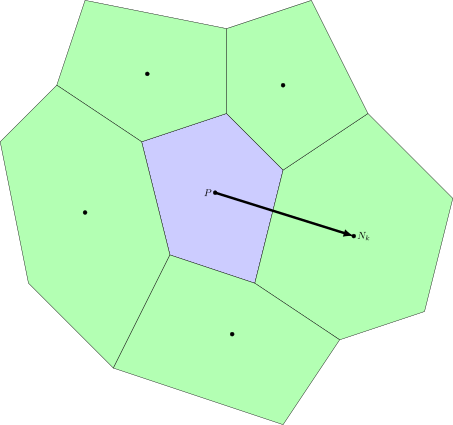

In [60]:
%%itikz --file-prefix implicit-demo1- --implicit-pic --scale=1
% Calculate centroid for the first polygon
\coordinate (A) at (0,0);
\coordinate (B) at (1,4);
\coordinate (C) at (-1,6);
\coordinate (D) at (-4,5);
\coordinate (E) at (-3,1);
\coordinate (centroid1) at (barycentric cs:A=1,B=1,C=1,D=1,E=1);

% Calculate centroid for the second polygon
\coordinate (F) at (3,-2);
\coordinate (G) at (6,-1);
\coordinate (H) at (7,3);
\coordinate (I) at (4,6);
\coordinate (centroid2) at (barycentric cs:A=1,F=1,G=1,H=1,I=1,B=1);

% Calculate centroid for the third polygon
\coordinate (J) at (-1,9);
\coordinate (K) at (2,10);
\coordinate (centroid3) at (barycentric cs:B=1,C=1,J=1,K=1,I=1);

% Calculate centroid for the third polygon
\coordinate (L) at (-6,10);
\coordinate (M) at (-7,7);
\coordinate (centroid4) at (barycentric cs:C=1,J=1,L=1,M=1,D=1);

% Calculate centroid for the third polygon
\coordinate (N) at (-9,5);
\coordinate (O) at (-8,0);
\coordinate (P) at (-5,-3);
\coordinate (centroid5) at (barycentric cs:E=1,D=1,M=1,N=1,O=1,P=1);

% Calculate centroid for the third polygon
\coordinate (Q) at (1,-5);
\coordinate (centroid6) at (barycentric cs:E=1,A=1,F=1,Q=1,P=1);

\draw[fill=blue!20] (A) -- (B) -- (C) -- (D) -- (E) -- cycle;
\draw[fill=green!30] (A) -- (F) -- (G) -- (H) -- (I) -- (B) -- cycle;
\draw[fill=green!30] (B) -- (C) -- (J) -- (K) -- (I) -- cycle;
\draw[fill=green!30] (D) -- (C) -- (J) -- (L) -- (M) -- cycle;
\draw[fill=green!30] (E) -- (D) -- (M) -- (N) -- (O) -- (P) -- cycle;
\draw[fill=green!30] (E) -- (A) -- (F) -- (Q) -- (P) -- cycle;

% Draw centroids
\filldraw[black] (centroid1) circle (2pt) node[left] {$P$};
\filldraw[black] (centroid2) circle (2pt) node[right] {$N_k$};
\filldraw[black] (centroid3) circle (2pt);
\filldraw[black] (centroid4) circle (2pt);
\filldraw[black] (centroid5) circle (2pt);
\filldraw[black] (centroid6) circle (2pt);

% Draw line between centroids
\draw[black, thick] (centroid1) -- (centroid2);

% Draw line between centroid2 and midpoint
\draw[black, thick,-latex,line width=2.5pt] (centroid1) -- (centroid2);


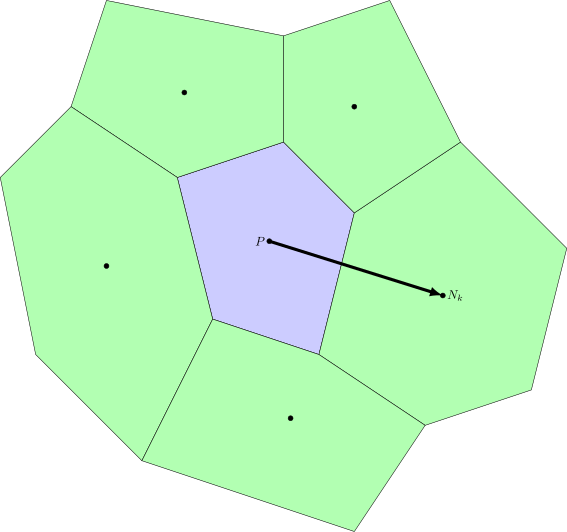

In [61]:
from IPython.display import Image
Image("./Images/LS_Square.png")

$$\begin{pmatrix}
\Delta x_1 & \Delta y_1 \\
\Delta x_2 & \Delta y_2 \\
\Delta x_3 & \Delta y_3 \\
\vdots & \vdots\\
\Delta x_m & \Delta y_m \\
\end{pmatrix} 
\begin{pmatrix}
\left(\frac{\partial \phi}{\partial x}\right)_P\\
\left(\frac{\partial \phi}{\partial y}\right)_P\\
\end{pmatrix}
=
\begin{pmatrix}
\Delta \phi_{N_{k1}} - \phi_P\\
\Delta \phi_{N_{k2}} - \phi_P\\
\Delta \phi_{N_{k3}} - \phi_P\\
\vdots\\
\Delta \phi_{N_{km}} - \phi_P\\
\end{pmatrix} $$

# This can be written as AX = b

# This can be solved as a Least square problem

# In this code we used the Normal Equation

# $A^{T}AX = A^{T}b$

# $X = (A^{T}A)^{-1}A^{T}b$

In [62]:
def Grad_Phi_LS(Element_Element_Connectivity_new,Element_cen,phi_0):
    """
    Input:
    Element_Element_Connectivity_new: Element Element Connectivity new (Previously Calculated)
    Element_cen: Element cen (Previousy Calculated)
    phi_0: Solution of phi at the last iteration or time step
    
    Output:
    Element_grad_phi: grad phi at the centroid of the element
    """
    
    Num_Triangles = Element_Element_Connectivity_new.shape[0]
    Element_grad_phi = np.zeros((Num_Triangles,3))
    for i in range(Num_Triangles):
        Element = Element_Element_Connectivity_new[i,0]
        Nb_Elements = Element_Element_Connectivity_new[i,1:]
        cen = Element_cen[int(Element),1:]
        num_nb = Nb_Elements.shape[0]
        temp = np.zeros((num_nb,dim))
        temp_rhs = np.zeros((num_nb))
        for j in range(Nb_Elements.shape[0]):
            cen_nb = Element_cen[int(Nb_Elements[j]),1:]
            p_Nb_vec = cen_nb - cen
            temp[j,:] = p_Nb_vec
            temp_rhs[j] = phi_0[Nb_Elements[j]] - phi_0[Element]
        grad = np.linalg.inv(temp.T@temp)@(temp.T@temp_rhs)
        Element_grad_phi[i,0] = Element
        Element_grad_phi[i,1:] = grad
        # print(grad)
        # print(Element_grad_phi[i,1:])
    return Element_grad_phi

****************

# Jacobi Solver:

*************************

In [63]:
def Jacobi_Solver(A,b,N):
    """
    Input: 
    A: Coefficient Matrix
    b: RHS
    N: Number of iterations
    
    Output:
    x: Ax = b
    
    Description:
    This function solves Ax = b using Jacobi's method
    """
    diag_A = A.diagonal()
    temp = (A - (diag_A*np.eye(A.shape[0])))
    x = np.zeros(b.shape[0])
    diad_A_inv = diag_A**(-1)
    for i in range(N):
        x = diad_A_inv*(b - temp@x)
    return x

## Correction form:
## $$ x^{k+1} = ((1-{\alpha})x^{k}) + ((1-{\alpha})x_{0})$$
## k = iteration number
## $x_{0}$ is the value from the last outer iteration of the solver
## $\alpha$ is the under relaxation factor

## We can go from (k+1) to k using any of the methods
## I choose to use Jacobi Method

In [64]:
def Jacobi_Solver_Special(A,b,x_0,urf_x,N):
    """
    Input: 
    A: Coefficient Matrix
    b: RHS
    x_0: Solution in the last iteration
    urf_x: Under relaxation factor used for x
    N: Number of iterations
    
    Output:
    x: Ax = b
    
    Description:
    This function solves Ax = b using Jacobi's method in the Correction form.
    This was mentioned in Sandip Mazumder's Lecture Series on CFD (Lecture 2)
    Link to his playlist on youtube: 
    https://www.youtube.com/playlist?list=PLVuuXJfoPgT4gJcBAAFPW7uMwjFKB9aqT
    """
    diag_A = A.diagonal()
    temp = (A - (diag_A*np.eye(A.shape[0])))
    x = np.zeros(b.shape[0])
    diad_A_inv = diag_A**(-1)
    for i in range(N):
        x = (urf_x*diad_A_inv*(b - temp@x)) + ((1-urf_x)*x_0)
    return x

*************************************

# Functions to collect mesh data for the solver:

********************

In [65]:
def P_prime_Nk_prime_len(Diffusion_mesh_data,Element,Edge):
    """
    Input:
    Diffusion_mesh_data,
    Element
    Edge
    
    Output:
    Length of the p_prime_Nk_prime vector
    """
    
    for i in range(Diffusion_mesh_data.shape[0]):
        if Diffusion_mesh_data[i,0] == Element:
            # Element is matched
            if Diffusion_mesh_data[i,1] == Edge:
                p_prime_Nk_prime_len = Diffusion_mesh_data[i,6]
    return p_prime_Nk_prime_len

In [66]:
def p_p_prime_data(Diffusion_mesh_data,Element,Edge):
    """
    Input:
    Diffusion_mesh_data,
    Element
    Edge
    
    Output:
    p_p_prime vector
    """
    
    for i in range(Diffusion_mesh_data.shape[0]):
        if Diffusion_mesh_data[i,0] == Element:
            # Element is matched
            if Diffusion_mesh_data[i,1] == Edge:
                p_p_prime = Diffusion_mesh_data[i,2:4]
    return p_p_prime

In [67]:
def nk_nk_prime_data(Diffusion_mesh_data,Element,Edge):
    """
    Input:
    Diffusion_mesh_data,
    Element
    Edge
    
    Output:
    nk_nk_prime vector
    """
    
    for i in range(Diffusion_mesh_data.shape[0]):
        if Diffusion_mesh_data[i,0] == Element:
            # Element is matched
            if Diffusion_mesh_data[i,1] == Edge:
                nk_nk_prime = Diffusion_mesh_data[i,4:6]
    return nk_nk_prime

In [68]:
def neg_k_p_prime_data(Diffusion_mesh_data,Element,Edge):
    """
    Input:
    Diffusion_mesh_data,
    Element
    Edge
    
    Output:
    neg_k_p_prime vector
    """
    for i in range(Diffusion_mesh_data.shape[0]):
        if Diffusion_mesh_data[i,0] == Element:
            # Element is matched
            if Diffusion_mesh_data[i,1] == Edge:
                neg_k_p_prime = Diffusion_mesh_data[i,7:9]
    return neg_k_p_prime

********************************

In [69]:
def Plot_Edge_Number_Cell_Number(Node_Coordinates,Element_Node_Connectivity,Face_Centroid,Element_cen):
    """
    Input:
    Node_Coordinates: Node Coordinates (Previously Calculated)
    Element_Node_Connectivity: Element Node Connectivity (Previously Calculated)
    Face_Centroid: Face Centroid (Previously Calculated)
    
    Output:
    This function plots mesh with edge number and cell number
    """
    temp = np.zeros((4,2))
    x = Node_Coordinates[:,0]
    y = Node_Coordinates[:,1]
    for i in range(Element_Node_Connectivity.shape[0]):
        Nodes = Element_Node_Connectivity[i,1:]
        Nodes = np.array(Nodes,dtype = int)
        temp[:3,0] = x[Nodes]
        temp[:3,1] = y[Nodes]
        temp[-1,0] = x[Nodes[0]]
        temp[-1,1] = y[Nodes[0]]
        X = temp[:,0]
        Y = temp[:,1]
        plt.plot(X,Y)
        # plt.plot(x[Nodes[0]],y[Nodes[0]],"-b*")
    # plt.plot(Face_Centroid[:,1],Face_Centroid[:,2],"gd")
    # for i in range(Num_Edges):
        # plt.text(Face_Centroid[i,1],Face_Centroid[i,2],int(Face_Centroid[i,0]))
    for i in range(Num_Triangles):
        plt.text(Element_cen[i,1],Element_cen[i,2],int(Element_cen[i,0]))
    plt.axis('scaled')
    plt.show()

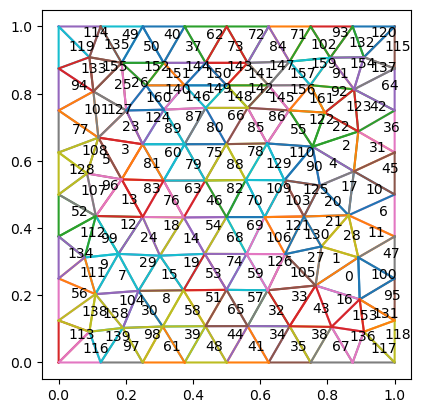

In [70]:
Plot_Edge_Number_Cell_Number(Node_Coordinates,Element_Node_Connectivity,Face_Centroid,Element_cen)

********************************

# Post Processing:

**************************************************

In [71]:
def Post_Process(phi,string):
    temp = np.zeros((4,2))
    Node_Coordinates,Point_Nodes,Curve_Nodes,Surface_Nodes = Mesh_Nodes(Mesh_File)
    x = Node_Coordinates[:,0]
    y = Node_Coordinates[:,1]
    cmap = "BuPu"
    # cmap = "viridis"
    for i in range(Element_Node_Connectivity.shape[0]):
        Nodes = Element_Node_Connectivity[i,1:]
        Nodes = np.array(Nodes,dtype = int)
        temp[:3,0] = x[Nodes]
        temp[:3,1] = y[Nodes]
        temp[-1,0] = x[Nodes[0]]
        temp[-1,1] = y[Nodes[0]]
        X = temp[:,0]
        Y = temp[:,1]
        plt.plot(X,Y,"k")
        color = plt.cm.get_cmap(cmap)((phi[i] - min(phi)) / (max(phi) - min(phi)))
        plt.fill(X,Y,color=color)
        # plt.plot(x[Nodes[0]],y[Nodes[0]],"-b*")
    scalar_map = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize(vmin=min(phi), vmax=max(phi)))
    scalar_map.set_array(phi)
    cbar = plt.colorbar(scalar_map)
    cbar.set_label(r'$\Phi$: '+string)
    plt.title(string)
    plt.show()

***********************************************************

# Unit Vectors:

**************************************************

In [72]:
x_hat = np.array([1,0])

In [73]:
y_hat = np.array([0,1])

********************************

# Momentum solver:

******************************

## X-Momentum Equation:

# $$\frac{\partial (\rho u)}{\partial t} + \nabla \cdot (\rho u \mathbf{V}) = -(\nabla p \cdot \hat{x}) + \nabla \cdot (\mu \nabla u)$$

## Considering the steady case

# $$\nabla \cdot (\rho u \mathbf{V}) = -(\nabla p \cdot \hat{x}) + \nabla \cdot (\mu \nabla u)$$

# $$\nabla \cdot (\rho u \mathbf{V} - \mu \nabla u ) = -(\nabla p \cdot \hat{x})$$

## Integrating over a control volume

# $$\int_{V} \nabla \cdot (\rho \mathbf{uV} - \mu \nabla \mathbf{u}) \, dV = - \int_{V} (\nabla p \cdot \hat{x}) \, dV$$

# Applying Gauss Divergence theorem to the divergence term $(\int_{V} \nabla \cdot (\rho \mathbf{uV} - \mu \nabla \mathbf{u}) \, dV)$ on the LHS

# $$\oint_{S} (\rho \mathbf{uV} - \mu \nabla \mathbf{u}) \cdot d\mathbf{S} = - \int_{V} (\nabla p \cdot \hat{x}) \, dV$$

# $$\oint_{S} (\rho \mathbf{uV} - \mu \nabla \mathbf{u}) \cdot \mathbf{n} \, dS = - \int_{V} (\nabla p \cdot \hat{x}) \, dV$$

## $\mathbf{dS} \text{ is the differential surface area vector.} \\
\mathbf{n} \text{ is the outward unit normal vector to the surface } S. \\
dS \text{ is the differential scalar surface area.}
$

## Now consider only 1 cell of the mesh

# $$\oint_{S} (\rho \mathbf{uV} - \mu \nabla \mathbf{u}) \cdot \mathbf{n} \, dS = - \int_{V} (\nabla p \cdot \hat{x}) \, dV$$

## Consider the LHS term

## $$LHS\, = \oint_{S} (\rho \mathbf{uV} - \mu \nabla \mathbf{u}) \cdot \mathbf{n} \, dS $$

## $$LHS\, = \sum_{ip} (\rho \mathbf{u} \mathbf{V} - \mu \nabla \mathbf{u})_{ip} \cdot \mathbf{n}_{ip} \Delta S_{ip} $$

## Here, ip is the integration point over the surface of the control volume or cell. In this 2D case it is the mid point of the edges.

## $$LHS\, = \sum_{ip} (\rho \mathbf{u} \mathbf{V})_{ip} \cdot \mathbf{n}_{ip} \Delta S_{ip} - \sum_{ip} (\mu \nabla \mathbf{u})_{ip} \cdot \mathbf{n}_{ip} \Delta S_{ip} $$

## $$LHS\, = \sum_{ip} \rho \mathbf{u}_{ip} \mathbf{V}_{ip} \cdot \mathbf{n}_{ip} \Delta S_{ip} - \sum_{ip} \mu (\nabla \mathbf{u})_{ip} \cdot \mathbf{n}_{ip} \Delta S_{ip} $$

## Let, 
## $$ LHS = LHS_1 + LHS_2$$

## where, 
## $$ LHS_1 = \sum_{ip} \rho \mathbf{u}_{ip} \mathbf{V}_{ip} \cdot \mathbf{n}_{ip} \Delta S_{ip}$$
## $$ LHS_2 = - \sum_{ip} \mu (\nabla \mathbf{u})_{ip} \cdot \mathbf{n}_{ip} \Delta S_{ip}$$

## Consider, $LHS_1$
## $$ LHS_1 = \sum_{ip} \rho \mathbf{u}_{ip} \mathbf{V}_{ip} \cdot \mathbf{n}_{ip} \Delta S_{ip}$$

## Here, $\mathbf{V}_{ip}$ term will be calculated using Rhie Chow Interpolation or PWIM (Pressure Weighted Interpolation Method

## So, $\mathbf{V}_{ip}$ term will be known

## Let, $$F_{ip} = \rho \mathbf{V}_{ip} \cdot \mathbf{n}_{ip} \Delta S_{ip}$$

## Here, $F_{ip}$ represents the flux flowing out of the cell through the edge corresponding to ip

## Let's apply, Upwind scheme to this $LHS_1$ 

## $$ LHS_1 = \sum_{ip} \rho \mathbf{u}_{ip} \mathbf{V}_{ip} \cdot \mathbf{n}_{ip} \Delta S_{ip}$$

## So, 
## If, $$F_{ip} = \rho \mathbf{V}_{ip} \cdot \mathbf{n}_{ip} \Delta S_{ip} > 0$$
## $$u_{ip} = u_{o}$$
## If, $$F_{ip} = \rho \mathbf{V}_{ip} \cdot \mathbf{n}_{ip} \Delta S_{ip} < 0$$
## $$u_{ip} = u_{nb}$$
## Here, "o" represents the cell under consideration and "nb" represents neighbouring cell associated with a particular edge (having ip in it)

## So,
## $$ LHS_1 = \sum_{ip} F_{ip} \mathbf{u}_{ip}$$

## This can be written as following:

## $$ LHS_1 = \sum_{ip} F_{ip} \mathbf{u}_{ip}$$

## $$ LHS_1 = \sum_{ip} F_{ip} \mathbf{u}_{ip} = \sum_{ip} \bigg( \bigg(\frac{|F_{ip}| + F_{ip}}{2}\bigg) \mathbf{u}_{0} - \bigg(\frac{|F_{ip}| - F_{ip}}{2}\bigg) \mathbf{u}_{nb}\bigg)$$

## Consider, $LHS_2$
## $$ LHS_2 = - \sum_{ip} \mu (\nabla \mathbf{u})_{ip} \cdot \mathbf{n}_{ip} \Delta S_{ip}$$

## This term will be dealt similar to that of advection-diffusion or diffusion equation

In [74]:
%reload_ext itikz

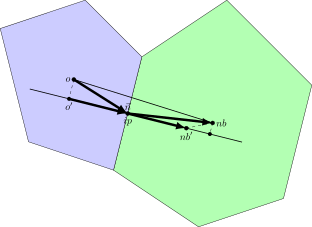

In [75]:
%%itikz --file-prefix implicit-demo- --implicit-pic --scale=1
\usetikzlibrary{calc}

% Calculate centroid for the first polygon
\coordinate (A) at (0,0);
\coordinate (B) at (1,4);
\coordinate (C) at (-1,6);
\coordinate (D) at (-4,5);
\coordinate (E) at (-3,1);
\coordinate (centroid1) at (barycentric cs:A=1,B=1,C=1,D=1,E=1);

% Calculate centroid for the second polygon
\coordinate (F) at (3,-2);
\coordinate (G) at (6,-1);
\coordinate (H) at (7,3);
\coordinate (I) at (4,6);
\coordinate (centroid2) at (barycentric cs:A=1,F=1,G=1,H=1,I=1,B=1);

\draw[fill=green!30] (A) -- (F) -- (G) -- (H) -- (I) -- (B) -- cycle;
\draw[fill=blue!20] (A) -- (B) -- (C) -- (D) -- (E) -- cycle;

% Draw centroids
\filldraw[black] (centroid1) circle (2pt) node[left] {$o$};
\filldraw[black] (centroid2) circle (2pt) node[right] {$nb$};

% Draw midpoint of the common edge
\coordinate (midpoint) at (barycentric cs:A=1,B=1);

% Draw centroids
\filldraw[black] (midpoint) circle (2pt) node[below] {$ip$};

% Draw line between centroids
\draw[black, thick] (centroid1) -- (centroid2);

% Draw line between centroid1 and midpoint
\draw[black, thick,-latex,line width=2.5pt] (centroid1) -- (midpoint);

% Draw line between centroid2 and midpoint
\draw[black, thick,-latex,line width=2.5pt] (midpoint) -- (centroid2);

% Calculate vector AB
\coordinate (vecAB) at ($(B)-(A)$);

% Calculate perpendicular line passing through the midpoint
\coordinate (perpendicular) at ($(midpoint)!1!90:(vecAB)$);

% Draw perpendicular line
% \draw[black, thick] (midpoint) -- (perpendicular);


% Calculate perpendicular line passing through the midpoint
\coordinate (perpendicular1) at ($(midpoint)!1!-90:(vecAB)$);

% Draw perpendicular line
% \draw[black, thick] (midpoint) -- (perpendicular1);

% Extend the perpendicular lines
\coordinate (extPerpendicular) at ($(perpendicular)!-1.5cm!(midpoint)$);
\coordinate (extPerpendicular1) at ($(perpendicular1)!-2.1cm!(midpoint)$);

% Draw perpendicular lines
\draw[black, thick] (midpoint) -- (extPerpendicular);
\draw[black, thick] (midpoint) -- (extPerpendicular1);

\coordinate (pointOnPerpendicular1) at ($(midpoint)!1cm!(perpendicular1)$);
\fill [black] ($(midpoint)!(centroid1)!(pointOnPerpendicular1)$) circle [radius=2pt];

\coordinate (pointOnPerpendicular) at ($(midpoint)!1cm!(perpendicular)$);
\fill [black] ($(midpoint)!(centroid2)!(pointOnPerpendicular)$) circle [radius=2pt];

\coordinate (p_prime) at ($(midpoint)!(centroid1)!(pointOnPerpendicular1)$);
\coordinate (Nk_prime) at ($(midpoint)!(centroid2)!(pointOnPerpendicular)$);

\draw[black, dashed] (centroid1) -- (p_prime);

\draw[black, dashed] (centroid2) -- (Nk_prime);

% Calculate perpendicular line passing through the midpoint
\coordinate (Nk_prime) at ($(midpoint)!1!180:(p_prime)$);

\filldraw[black] (Nk_prime) circle (2pt) node[below] [below] {${nb}^{\prime}$};

\draw[black, dashed] (Nk_prime) -- (centroid2);

\draw[black, thick,-latex,line width=2.5pt] (midpoint) -- (Nk_prime);

\draw[black, thick,-latex,line width=2.5pt] (p_prime) -- (midpoint);

\node at (p_prime) [below] {$o^{\prime}$};
\node at (midpoint) [above] {$\vec{n}$};

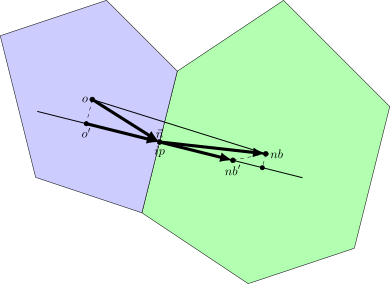

In [76]:
from IPython.display import Image
Image("./Images/Formulation_NS.png")

## This diagram is motivated by 
## [Ferziger JH, Perić M, Street RL. Computational methods for fluid dynamics. springer; 2019 Aug 16.]
## [Chapter: 9,Fig. 9.19: On the approximation of diffusion fluxes for arbitrary polyhedral CVs]
## [Page: 312]    

## NOTE: ip is k in the above figure

## $$(\nabla \mathbf{u})_{ip} \cdot (\mathbf{n})_{ip} = \bigg( \frac{\partial \mathbf{u}}{\partial n} \bigg)_{ip}$$

## $$\left(\frac{\partial \mathbf{u}}{\partial n}\right)_{ip} \approx \frac{\mathbf{u}_{nb^{\prime}} - \mathbf{u}_{o^{\prime}}}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|}$$

## $$a = \min((\mathbf{r}_{ip} - \mathbf{r}_o) \cdot \mathbf{n}, (\mathbf{r}_{nb} - \mathbf{r}_{ip}) \cdot \mathbf{n})$$

## $$\mathbf{r}_{o^{\prime}} = \mathbf{r}_{ip} - a\mathbf{n}, \quad \mathbf{r}_{nb^{\prime}} = \mathbf{r}_{ip} + a\mathbf{n}$$

## $$\mathbf{u}_{o^{\prime}} = \mathbf{u}_o + (\nabla \mathbf{u})_o \cdot (\mathbf{r}_o' - \mathbf{r}_o), \quad \mathbf{u}_{{nb}^{\prime}} = \mathbf{u}_{nb} + (\nabla \mathbf{u})_{nb} \cdot (\mathbf{r}_{nb}' - \mathbf{r}_{nb})$$

## $$\left(\frac{\partial \mathbf{u}}{\partial n}\right)_{ip} \approx \frac{\mathbf{u}_{nb} - \mathbf{u}_{o}}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|} +  \frac{(\nabla \mathbf{u})_{nb} \cdot (\mathbf{r}_{nb'} - \mathbf{r}_{nb}) - (\nabla \mathbf{u})_{o} \cdot (\mathbf{r}_{o'} - \mathbf{r}_{o})}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|} $$

### Here the first term in the RHS is treated implicitly and the second term (also known as deferred correction term) is treated explicitly using the values of the previous iteration.

## So,
## $$\left(\frac{\partial \mathbf{u}}{\partial n}\right)_{ip} \approx \frac{\mathbf{u}_{nb} - \mathbf{u}_{o}}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|} +  \bigg( \frac{(\nabla \mathbf{u})_{nb} \cdot (\mathbf{r}_{nb'} - \mathbf{r}_{nb}) - (\nabla \mathbf{u})_{o} \cdot (\mathbf{r}_{o'} - \mathbf{r}_{o})}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|} \bigg)_{0}$$

## Consider, $LHS_2$
## $$ LHS_2 = - \sum_{ip} \mu \bigg( \frac{\mathbf{u}_{nb} - \mathbf{u}_{o}}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|} +  \bigg( \frac{(\nabla \mathbf{u})_{nb} \cdot (\mathbf{r}_{nb'} - \mathbf{r}_{nb}) - (\nabla \mathbf{u})_{o} \cdot (\mathbf{r}_{o'} - \mathbf{r}_{o})}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|} \bigg)_{0} \bigg) \Delta S_{ip}$$

## As, 
## $$ LHS = LHS_1 + LHS_2$$

## $$ LHS = \bigg[
\sum_{ip} F_{ip} \mathbf{u}_{ip} = \sum_{ip} \bigg( \bigg(\frac{|F_{ip}| + F_{ip}}{2}\bigg) \mathbf{u}_{0} - \bigg(\frac{|F_{ip}| - F_{ip}}{2}\bigg) \mathbf{u}_{nb}\bigg) 
\newline
- \sum_{ip} \mu \bigg( \frac{\mathbf{u}_{nb} - \mathbf{u}_{o}}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|} +  \bigg( \frac{(\nabla \mathbf{u})_{nb} \cdot (\mathbf{r}_{nb'} - \mathbf{r}_{nb}) - (\nabla \mathbf{u})_{o} \cdot (\mathbf{r}_{o'} - \mathbf{r}_{o})}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|} \bigg)_{0} \bigg) \Delta S_{ip} \bigg]$$

## Consider the RHS term
## $$RHS = - \int_{V} (\nabla p \cdot \hat{x}) \, dV$$

## $$RHS = - (\nabla p)_0 \cdot \hat{x} \, \Delta V_0$$

## Here, $(\nabla p)_0$ is calculated using the Least Square method

## So, we have
## $$\bigg[
\sum_{ip} F_{ip} \mathbf{u}_{ip} = \sum_{ip} \bigg( \bigg(\frac{|F_{ip}| + F_{ip}}{2}\bigg) \mathbf{u}_{0} - \bigg(\frac{|F_{ip}| - F_{ip}}{2}\bigg) \mathbf{u}_{nb}\bigg) 
\newline
- \sum_{ip} \mu \bigg( \frac{\mathbf{u}_{nb} - \mathbf{u}_{o}}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|} +  \bigg( \frac{(\nabla \mathbf{u})_{nb} \cdot (\mathbf{r}_{nb'} - \mathbf{r}_{nb}) - (\nabla \mathbf{u})_{o} \cdot (\mathbf{r}_{o'} - \mathbf{r}_{o})}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|} \bigg)_{0} \bigg) \Delta S_{ip} \bigg]
\newline
= - (\nabla p)_0 \cdot \hat{x} \, \Delta V_0$$

## This equation can be written as,
## $$A_0 u_0 + \sum_{nb} A_{nb} u_{nb} = B_u$$

## This equation will be solved using the correction form

## Y-Momentum Equation:

# $$\frac{\partial (\rho v)}{\partial t} + \nabla \cdot (\rho v \mathbf{V}) = -(\nabla p \cdot \hat{y}) + \nabla \cdot (\mu \nabla v)$$

## Similar to X-Momentum equation, we have

## $$\bigg[
\sum_{ip} F_{ip} \mathbf{v}_{ip} = \sum_{ip} \bigg( \bigg(\frac{|F_{ip}| + F_{ip}}{2}\bigg) \mathbf{v}_{0} - \bigg(\frac{|F_{ip}| - F_{ip}}{2}\bigg) \mathbf{v}_{nb}\bigg) 
\newline
- \sum_{ip} \mu \bigg( \frac{\mathbf{v}_{nb} - \mathbf{v}_{o}}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|} +  \bigg( \frac{(\nabla \mathbf{v})_{nb} \cdot (\mathbf{r}_{nb'} - \mathbf{r}_{nb}) - (\nabla \mathbf{v})_{o} \cdot (\mathbf{r}_{o'} - \mathbf{r}_{o})}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|} \bigg)_{0} \bigg) \Delta S_{ip} \bigg]
\newline
= - (\nabla p)_0 \cdot \hat{y} \, \Delta V_0$$

## Note that the Flux terms will not be changing.

## This equation can be written as,
## $$A_0 v_0 + \sum_{nb} A_{nb} v_{nb} = B_v$$

## This equation will be solved using the correction form

In [77]:
def Solve_Momentum_phi_star(unit_vec,Psre_0,V_0,V_ip_0,urf_phi,iter_N,eval_con_mat):
    """
    Input:
    unit_vec: Unit vector (either x_hat or y_hat )
    Psre_0: Pressure at the cell centroid from the previous iteration
    V_0: Velocity at the cell centroid at the previous iteration
    V_ip_0: Velocity at the face centroid (edge centroid in 2D) at the previous iteration
    urf_phi: Under Relaxation Factor for phi
    iter_N: Number of iteration of the iterative solver
    eval_con_mat: Evaluate the condition number of the coefficient matrix
    eval_con_mat: 1: ON
    
    Output:
    RHS: RHS of the momentum equation
    A: Coefficient matrix of the momentum equation
    phi: Solution
    """
    
    # Do Not change this solve it using phi 
    # Element_Edge_Grad_p_Comp = Element_Edge_Grad_p_Comp_Calculate(Element_Element_Connectivity_new,Element_cen,Element_Edge_Connectivity_new,Psre_0,Boundary_Edges,Face_Centroid)
    
    # For now remove this term
    # V_ip_Edges = V_ip_Calculate(A_u,V_0,Psre_0)
    # V_ip_Edges = np.zeros((Num_Edges,3))
    V_ip_Edges = V_ip_0
    
    # unit_vec = x_hat
    A = np.zeros((Num_Triangles,Num_Triangles))
    phi = np.zeros((Num_Triangles))
    phi_0 = V_0@unit_vec
    RHS = np.zeros(Num_Triangles)
    # T = np.linspace(0,50,50)
    # dt = T[1]-T[0]
    
    # phi_dp = Phi_dp_Calculate(V_ip_Edges,dt)

    A = np.zeros((Num_Triangles,Num_Triangles))
    # LS
    # print(RHS)
    # Needed for the deferred correction of the diffusion term
    Element_grad_phi_LS = Grad_Phi_LS(Element_Element_Connectivity_new,Element_cen,phi_0)
    Element_grad_phi = Element_grad_phi_LS.copy()
    # print(RHS)

    # This the part of the pressure term of the momentum equation
    Element_grad_Psre_LS = Grad_Phi_LS(Element_Element_Connectivity_new,Element_cen,Psre_0)
    Element_grad_Psre = Element_grad_Psre_LS.copy()

    # This the part of the pressure term of the momentum equation
    RHS = (-np.dot(Element_grad_Psre[:,1:],unit_vec)*Element_Area[:,1:].T[0])

    # This the part of the temporal term of the momentum equation
    # RHS = RHS + (Element_Mass[:,1]*phi_0/dt)
    for i in range(Element_Element_Connectivity_new.shape[0]):
        Element = Element_Element_Connectivity_new[i,0]
        x = Element_cen[Element,1]
        y = Element_cen[Element,2]

        Nb_Elements = Element_Element_Connectivity_new[i,1:]

        # This the part of the temporal term of the momentum equation
        # Steady state
        # A[Element,Element] = (Element_Mass[Element,1]/dt)

        Edges = Element_Edge_Connectivity_new[Element,1:]
        for j in range(Nb_Elements.shape[0]):
            nb_element = Nb_Elements[j]
            nb_edges = Element_Edge_Connectivity_new[nb_element,1:]
            common_edge = np.intersect1d(Edges,nb_edges)
            if common_edge.shape[0] == 1:

                # Diffusion part
                # Internal Edges
                Edge = int(common_edge[0])
                edge_len = Edge_Len[Edge,1]
                ds = edge_len
                dl = P_prime_Nk_prime_len(Diffusion_mesh_data,Element,Edge)
                # print(dl)
                # This the part of the diffusion term of the momentum equation
                A[Element,Element] = A[Element,Element] + (Gamma_phi*ds/dl)
                # print(nb_element)
                # This the part of the diffusion term of the momentum equation
                A[Element,nb_element] = A[Element,nb_element] + (-Gamma_phi*ds/dl) 
                # Deferred Correction for diffusion
                grad_phi_p = Element_grad_phi[Element,1:]
                p_p_prime = p_p_prime_data(Diffusion_mesh_data,Element,Edge)
                grad_phi_nb = Element_grad_phi[nb_element,1:]
                nk_nk_prime = nk_nk_prime_data(Diffusion_mesh_data,nb_element,Edge)
                temp = Gamma_phi*(np.dot(grad_phi_nb,nk_nk_prime) - np.dot(grad_phi_p,p_p_prime))*ds/dl
                diff_temp = temp
                # This the part of the diffusion term of the momentum equation
                RHS[Element] = RHS[Element] + (diff_temp)

                # Advec
                # V_ip = V_0[Element,:]
                V_ip = V_ip_Edges[Element,1:]
                n_ip = neg_k_p_prime_data(Diffusion_mesh_data,Element,Edge)
                # See the below term it is the mass flux at the edge we are considering
                m_dot_ip = (rho*(np.dot(V_ip,n_ip))*ds)
                # To be consistent with Majumdar sir's note
                F_ip = m_dot_ip
                # This is Upwinding here
                A[Element,Element] = A[Element,Element] + (0.5*(abs(F_ip)+F_ip))
                A[Element,nb_element] = A[Element,nb_element] - (0.5*(abs(F_ip)-F_ip))

                # Deferred Correction for advection (NOT mentioned in the book)
                # This is because we are suppose to use convective schemes here
                # advec_temp = 0.5*(np.dot(grad_phi_p,p_p_prime) + np.dot(grad_phi_nb,nk_nk_prime))
                # advec_temp = advec_temp*m_dot_ip
                # advec_temp = 0
                
                
                # Pressure Part
                # Simply, use (grad(P).x^)*dV
                Element_grad_Psre_LS_comp = Element_grad_Psre_LS[Element,1:]@unit_vec
                element_Area = Element_Area[Element,1]
                Pressure_term = Element_grad_Psre_LS_comp*element_Area
                RHS[Element] = RHS[Element] - Pressure_term

                # print(temp)
            else:
                # Boundary Edges
                
                # Diffusion part
                # So apply boundary condition here
                # Do NOT do this, as the boundary condition imposed of the edge and not on the cells at the boundary
                # A[Element,Element] = 1
                # RHS[Element] = 0
                Edge = np.intersect1d(Boundary_Edges,common_edge)
                Edge = int(Edge[0])
                edge_len = Edge_Len[Edge,1]
                ds = edge_len
                dl = P_prime_Nk_prime_len(Diffusion_mesh_data,Element,Edge)
                # print(dl)
                # But this Nk_prime is NOT inside the computational domain
                # This is |k_p_prime|
                dl = dl/2
                # We know phi at k as it is the boundary edge
                # See the Fig: 9.19 in Peric and think for 1 s
                # So we have phi_k
                A[Element,Element] = A[Element,Element] + (Gamma_phi*ds/dl)

                # Deferred Correction
                Boundary_Cond_Edge = np.intersect1d([Edge],Face_Centroid[Face_Centroid[:,2] == 1][:,0])
                if Boundary_Cond_Edge.shape[0] == 1:
                    # print(f"We are at the Boundary Edge of top lid: {Boundary_Cond_Edge}")
                    if np.dot(unit_vec,x_hat) == 1:
                        # Boundary condition about u only and NOT v
                        phi_k_edge = 1
                        # print(f"We are at the top lid")
                else:
                    phi_k_edge = 0

                phi_k_edge_term = (-Gamma_phi*ds/dl)*phi_k_edge 
                # print(phi_k_edge_term)
                grad_phi_p = Element_grad_phi[Element,1:]
                p_p_prime = p_p_prime_data(Diffusion_mesh_data,Element,Edge)
                temp = Gamma_phi*(np.dot(grad_phi_p,p_p_prime))*ds/dl
                diff_temp = temp
                RHS[Element] = RHS[Element] - (diff_temp)
                RHS[Element] = RHS[Element] - phi_k_edge_term

                # Advection part
                # For boundaries we know phi_ip
                # phi = 0 at the boundary
                # V_ip = V_0[Element,:]
                V_ip = V_ip_Edges[Element,1:]
                n_ip = neg_k_p_prime_data(Diffusion_mesh_data,Element,Edge)
                m_dot_ip = (rho*(np.dot(V_ip,n_ip))*ds)
                F_ip = m_dot_ip
                # This is the velocity at the boundary edge
                phi_ip = V_ip@unit_vec
                advec_temp = F_ip*phi_ip
                RHS[Element] = RHS[Element] - advec_temp
                
                # Pressure Part
                # Simply, use (grad(P).x^)*dV
                Element_grad_Psre_LS_comp = Element_grad_Psre_LS[Element,1:]@unit_vec
                element_Area = Element_Area[Element,1]
                Pressure_term = Element_grad_Psre_LS_comp*element_Area
                RHS[Element] = RHS[Element] - Pressure_term


    # Iterative Solver
    # phi = Jacobi_Solver(A,RHS,iter_N)
    phi = Jacobi_Solver_Special(A,RHS,phi_0,urf_phi,iter_N)
    
    # phi = np.linalg.inv(A)@RHS
    
    phi_0_c = phi_0.copy()
    Res = np.linalg.norm(phi_0 - phi)
    phi_0 = phi.copy()
    phi_edges = V_ip_Edges[:,1:]@unit_vec
    
    if (eval_con_mat == 1):
        print(f"Condition Number of Coefficient matrix of momentum equation: {np.linalg.cond(A)}")
    
    return RHS,A,phi

******************************

## So, now we need to calculate $\mathbf{V}_{ip}$ term

## In the momentum equation hat quantities are the guessed value or values from the previous iteration

## $$A_{0|0} \hat{u}_0 + \sum_{nb} A_{nb|0} \hat{u}_{nb|0} = - (\nabla \hat{p})_0 \cdot \hat{x} \, \Delta V_0$$

## Now, if instead they were the correct values, then let's represent them using double hat

## $$A_{0|0} \hat{\hat{u}}_0 + \sum_{nb} A_{nb|0} \hat{\hat{u}}_{nb|0} = - (\nabla \hat{\hat{p}})_0 \cdot \hat{x} \, \Delta V_0$$

## Let's substract these two equations,

## $$A_{0|0} (\hat{\hat{u}}_0 - \hat{u}_0) + \sum_{nb} A_{nb|0} (\hat{\hat{u}}_{nb} - \hat{u}_{nb}) = - (\nabla (\hat{\hat{p}} - \hat{p} ) )_0 \cdot \hat{x} \, \Delta V_0$$

## The prime quantities are the correction to the guess values

## $$A_{0|0} ({u^{\prime}}_0) + \sum_{nb} A_{nb|0} {u^{\prime}}_{nb|0} = - (\nabla ({p^{\prime}} ) )_0 \cdot \hat{x} \, \Delta V_0$$

## $$({u^{\prime}}_0) + \frac{1}{A_{0|0}}\sum_{nb} A_{nb|0} {u^{\prime}}_{nb} = - \frac{1}{A_{0|0}}(\nabla ({p^{\prime}} ) )_0 \cdot \hat{x} \, \Delta V_0$$

## $$({u^{\prime}}_0)  = - \frac{1}{A_{0|0}}\sum_{nb} A_{nb} {u^{\prime}}_{nb} - \frac{1}{A_{0|0}}(\nabla ({p^{\prime}} ) )_0 \cdot \hat{x} \, \Delta V_0$$

## Now, apply SIMPLE approximation

## $$({u^{\prime}}_0)  = 0 - \frac{1}{A_{0|0}}(\nabla ({p^{\prime}} ) )_0 \cdot \hat{x} \, \Delta V_0$$

## $$({u^{\prime}}_0)  = - \frac{1}{A_{0|0}}(\nabla ({p^{\prime}} ) )_0 \cdot \hat{x} \, \Delta V_0$$

## Similarly for the neighbour nb

## $$A_{0|nb} \hat{u}_{nb} + \sum_{NB} A_{NB|nb} \hat{u}_{NB|nb} = - (\nabla \hat{p})_{nb} \cdot \hat{x} \, \Delta V_{nb}$$

## Now, if instead they were the correct values, then let's represent them using double hat

## $$A_{0|nb} \hat{\hat{u}}_{nb} + \sum_{NB} A_{NB|nb} \hat{\hat{u}}_{NB|nb} = - (\nabla \hat{\hat{p}} )_{nb} \cdot \hat{x} \, \Delta V_{nb}$$

## Let's substract these two equations,

## $$A_{0|nb} (\hat{\hat{u}}_{nb} - {\hat{u}}_{nb}) + \sum_{NB} A_{NB|nb} (\hat{\hat{u}}_{NB|nb} - {\hat{u}}_{NB|nb}) = - (\nabla (\hat{\hat{p}} - {\hat{p}}))_{nb} \cdot \hat{x} \, \Delta V_{nb}$$

## The prime quantities are the correction to the guess values

## $$A_{0|nb} ({\hat{u}^{\prime}}_{nb}) + \sum_{NB} A_{NB|nb} ({u^{\prime}}_{NB|nb}) = - (\nabla p^{\prime})_{nb} \cdot \hat{x} \, \Delta V_{nb}$$

## $$({\hat{u}^{\prime}}_{nb}) + \frac{1}{A_{0|nb}}\sum_{NB} A_{NB|nb} ({u^{\prime}}_{NB|nb}) = - \frac{1}{A_{0|nb}}(\nabla p^{\prime})_{nb} \cdot \hat{x} \, \Delta V_{nb}$$

## $$({\hat{u}^{\prime}}_{nb})  = - \frac{1}{A_{0|nb}}\sum_{NB} A_{NB|nb} ({u^{\prime}}_{NB|nb}) - \frac{1}{A_{0|nb}}(\nabla p^{\prime})_{nb} \cdot \hat{x} \, \Delta V_{nb}$$

## Now, apply SIMPLE approximation

## $$({\hat{u}^{\prime}}_{nb})  = 0 - \frac{1}{A_{0|nb}}(\nabla p^{\prime})_{nb} \cdot \hat{x} \, \Delta V_{nb}$$

## $$({\hat{u}^{\prime}}_{nb})  = - \frac{1}{A_{0|nb}}(\nabla p^{\prime})_{nb} \cdot \hat{x} \, \Delta V_{nb}$$

## As,
## $$A_{0|0} \hat{u}_0 + \sum_{nb} A_{nb|0} \hat{u}_{nb|0} = - (\nabla \hat{p})_0 \cdot \hat{x} \, \Delta V_0$$
## $$A_{0|nb} \hat{u}_{nb} + \sum_{NB} A_{NB|nb} \hat{u}_{NB|nb} = - (\nabla \hat{p})_{nb} \cdot \hat{x} \, \Delta V_{nb}$$

## So,
## $$\hat{u}_0 = - \frac{1}{A_{0|0}}\sum_{nb} A_{nb|0} \hat{u}_{nb|0} - \frac{1}{A_{0|0}}(\nabla \hat{p})_0 \cdot \hat{x} \, \Delta V_0$$
## $$\hat{u}_{nb} = - \frac{1}{A_{0|nb}}\sum_{NB} A_{NB|nb} \hat{u}_{NB|nb} - \frac{1}{A_{0|nb}}(\nabla \hat{p})_{nb} \cdot \hat{x} \, \Delta V_{nb}$$

## Rhie Chow interpolation:

## Think of an imaginary control volume at the egde with ip as follows:

## $$\hat{u}_{ip} = - \frac{1}{2}\left(\frac{1}{A_{0|0}}\sum_{nb} A_{nb|0} \hat{u}_{nb|0} + \frac{1}{A_{0|nb}}\sum_{NB} A_{NB|nb} \hat{u}_{NB|nb} \right)
\newline
- \frac{1}{2}\left(\frac{1}{A_{0|0}} + \frac{1}{A_{0|nb}}\right)(\nabla \hat{p})_{ip} \cdot \hat{x} \, \Delta V_{ip}$$

## $$\hat{u}_{ip} = \frac{1}{2}\left(\hat{u}_0 + \frac{1}{A_{0|0}}(\nabla \hat{p})_0 \cdot \hat{x} \, \Delta V_0 + \hat{u}_{nb} + \frac{1}{A_{0|nb}}(\nabla \hat{p})_{nb} \cdot \hat{x} \, \Delta V_{nb} \right)
\newline
- \frac{1}{2}\left(\frac{1}{A_{0|0}} + \frac{1}{A_{0|nb}}\right)(\nabla \hat{p})_{ip} \cdot \hat{x} \, \Delta V_{ip}$$

## Similarly,

## $$\hat{v}_{ip} = \frac{1}{2}\left(\hat{v}_0 + \frac{1}{A_{0|0}}(\nabla \hat{p})_0 \cdot \hat{x} \, \Delta V_0 + \hat{v}_{nb} + \frac{1}{A_{0|nb}}(\nabla \hat{p})_{nb} \cdot \hat{x} \, \Delta V_{nb} \right)
\newline
- \frac{1}{2}\left(\frac{1}{A_{0|0}} + \frac{1}{A_{0|nb}}\right)(\nabla \hat{p})_{ip} \cdot \hat{y} \, \Delta V_{ip}$$

## So, $V_{ip}$ can be calculated

## NOTE: $\Delta V_{ip}$ is the average of $\Delta  V_0$ and $\Delta  V_{nb}$

In [78]:
def V_ip_Calculate(A,V_0,Psre_0):
    """
    Input:
    A: Coefficient matrix of the momentum equation
    V_0: Cell centroid velocity from the last iteration
    Psre_0: Cell centroid pressure from the last iteration
    
    Output:
    V_ip: Edge velocity
    """
    V_ip = np.zeros((Num_Edges,3))

    Element_grad_Psre_LS = Grad_Phi_LS(Element_Element_Connectivity_new,Element_cen,Psre_0)
    Element_grad_Psre = Element_grad_Psre_LS.copy()

    Element_Edge_Grad_p_Comp = Element_Edge_Grad_p_Comp_Calculate(Element_Element_Connectivity_new,Element_cen,Element_Edge_Connectivity_new,Psre_0,Boundary_Edges,Face_Centroid)

    # phi_dp = Phi_dp_Calculate(V_ip_0,dt)
    unit_vecs = np.array([x_hat,y_hat])
    for d in range(dim):
        # This unit_vec should be x_hat or y_hat
        unit_vec = unit_vecs[d]
        comp = y_hat@unit_vec
        for i in range(Edge_Element_Connectivity.shape[0]):
            Edge = Edge_Element_Connectivity[i,0]
            # print(f"Edge: {Edge}")
            Elements = Edge_Element_Connectivity[i,1:]
            Vs = np.zeros(2)
            # dps = np.zeros(2)
            Element_grad_Psre_contribution = np.zeros(2)
            A_terms = np.zeros(2)
            Element_Vols = np.zeros(2)
            nb_Psre_Contribution = np.zeros(2)
            for j in range(Elements.shape[0]):
                # print(f"Elements[{j}]: {Elements[j]}")
                Vs[j] = V_0[Elements[j],comp]
                # dps[j] = phi_dp[Elements[j]]
                Element_grad_Psre_contribution[j] = Element_grad_Psre_LS[Elements[j],1:]@unit_vec
                Grad_p_Comp = Element_Edge_Grad_p_Comp_Collect(Element_Edge_Grad_p_Comp,Elements[j],Edge)
                A_terms[j] = A[Elements[j],Elements[j]]
                Element_Vols[j] = Element_Area[Elements[j],1]
                nb_Psre_Contribution[j] = (Element_grad_Psre_contribution[j]*Element_Vols[j]/A_terms[j])
            temp = (Vs.mean()) + (nb_Psre_Contribution.mean())
            # print(temp)
            # print(A_terms**(-1))
            # print(Grad_p_Comp@unit_vec)
            temp_1 = (0.5*np.sum(A_terms**(-1)))*(Grad_p_Comp@unit_vec)*(Element_Vols.mean())
            temp = temp - temp_1
            # print(temp_1)
            # print(temp)
            V_ip[Edge,0] = Edge
            
            # Boundary Condition
            common_edge_check = np.intersect1d(Edge,Boundary_Edges)
            # print(common_edge_check)
            if common_edge_check.shape[0] == 1:
                temp = 0
                Boundary_Cond_Edge = np.intersect1d([Edge],Face_Centroid[Face_Centroid[:,2] == 1][:,0])
                if Boundary_Cond_Edge.shape[0] == 1:
                    # print(f"We are at the Boundary Edge of top lid: {Boundary_Cond_Edge}")
                    if np.dot(unit_vec,x_hat) == 1:
                        # Boundary condition about u only and NOT v
                        temp = 1
                        
            
            
            V_ip[Edge,comp+1] = temp
    return V_ip

********************

## Edge volume calculate

**********************

In [79]:
def Edge_Volume_Calculate(Element_Area):
    """
    Input:
    Element_Area: Area of the elements
    
    Output:
    Edge_Volume: Volume of the Edge
    
    Description:
    Calculates the volume (Area in 2D) of the surface (Edge in 2D) as the average of the neighbouring cells
    """
    Edge_Volume = np.zeros((Num_Edges,2))
    for i in range(Num_Edges):
        Edge = Edge_Element_Connectivity[i,0]
        Edge_Volume[i,0] = Edge
        Elements = Edge_Element_Connectivity[i,1:]
        vols = np.zeros(Elements.shape[0])
        for j in range(Elements.shape[0]):
            Element = Elements[j]
            vols[j] = Element_Area[Element,1]
        Edge_Volume[i,1] = vols.mean()
    
    return Edge_Volume

In [80]:
Edge_Volume = Edge_Volume_Calculate(Element_Area)

**********************

## Now, if instead they were the correct values, then let's represent them using double hat

## $$\hat{\hat{u}}_{ip} = \frac{1}{2}\left(\hat{\hat{u}}_0 + \frac{1}{A_{0|0}}(\nabla \hat{\hat{p}})_0 \cdot \hat{x} \, \Delta V_0 + \hat{\hat{u}}_{nb} + \frac{1}{A_{0|nb}}(\nabla \hat{\hat{p}})_{nb} \cdot \hat{x} \, \Delta V_{nb} \right)
\newline
- \frac{1}{2}\left(\frac{1}{A_{0|0}} + \frac{1}{A_{0|nb}}\right)(\nabla \hat{\hat{p}})_{ip} \cdot \hat{x} \, \Delta V_{ip}$$

## Let's substract these two equations,

## $${u^{\prime}}_{ip} = \frac{1}{2}\left({u^{\prime}}_0 + \frac{1}{A_{0|0}}(\nabla {p^{\prime}})_0 \cdot \hat{x} \, \Delta V_0 + {u^{\prime}}_{nb} + \frac{1}{A_{0|nb}}(\nabla {p^{\prime}})_{nb} \cdot \hat{x} \, \Delta V_{nb} \right)
\newline
- \frac{1}{2}\left(\frac{1}{A_{0|0}} + \frac{1}{A_{0|nb}}\right)(\nabla {p^{\prime}})_{ip} \cdot \hat{x} \, \Delta V_{ip}$$

## Using the correction for o and nb

## $${u^{\prime}}_{ip} = \frac{1}{2}\left(0+0\right) - \frac{1}{2}\left(\frac{1}{A_{0|0}} + \frac{1}{A_{0|nb}}\right)(\nabla {p^{\prime}})_{ip} \cdot \hat{x} \, \Delta V_{ip}$$

## $${u^{\prime}}_{ip} = - \frac{1}{2}\left(\frac{1}{A_{0|0}} + \frac{1}{A_{0|nb}}\right)(\nabla {p^{\prime}})_{ip} \cdot \hat{x} \, \Delta V_{ip}$$

## Similarly we can get it also any direction  not just x or y

## So, we will do this correction along the normal to the surface to ensure that the velocity field satisfy continuity. As continuity will be effected by the normal component only so only one equation per edge of the cell.

## So, velocity along the normal outward will be,

## $$\hat{V_n}_{ip} = \frac{1}{2}\left(\hat{V_n}_0 + \frac{1}{A_{0|0}}(\nabla \hat{p})_0 \cdot \hat{n} \, \Delta V_0 + \hat{V_n}_{nb} + \frac{1}{A_{0|nb}}(\nabla \hat{p})_{nb} \cdot \hat{n} \, \Delta V_{nb} \right)
\newline
- \frac{1}{2}\left(\frac{1}{A_{0|0}} + \frac{1}{A_{0|nb}}\right)(\nabla \hat{p})_{ip} \cdot \hat{n} \, \Delta V_{ip}$$

## $$\hat{\hat{V_n}}_{ip} = \frac{1}{2}\left(\hat{\hat{V_n}}_0 + + \hat{\hat{V_n}}_{nb} \right)  + \frac{1}{2}\left(\frac{1}{A_{0|0}}(\nabla \hat{\hat{P}})_0 \cdot \hat{n} \, \Delta V_0 + \frac{1}{A_{0|nb}}(\nabla \hat{\hat{P}})_{nb} \cdot \hat{n} \, \Delta V_{nb} \right)
\newline
- \frac{1}{2}\left(\frac{1}{A_{0|0}} + \frac{1}{A_{0|nb}}\right)(\nabla \hat{\hat{P}})_{ip} \cdot \hat{n} \, \Delta V_{ip}$$

## $${{V_n}^{\prime}}_{ip} = - \frac{1}{2}\left(\frac{1}{A_{0|0}} + \frac{1}{A_{0|nb}}\right)(\nabla {p^{\prime}})_{ip} \cdot \hat{n} \, \Delta V_{ip}$$

## Let's impose continuity equation now.

## $$\nabla \cdot \mathbf{V} =  0$$

## $$\int_V \nabla \cdot \mathbf{V} dV =  0$$

## $$\oint_S \mathbf{V} \cdot d\mathbf{S} =  0$$

## $$\oint_S \mathbf{V} \cdot \mathbf{n} dS =  0$$

## $$\sum_{ip} \mathbf{V_{ip}} \cdot \mathbf{n_{ip}} \Delta S_{ip} =  0$$

## $$\sum_{ip} {V_n}_{ip}\Delta S_{ip} =  0$$

## $$\sum_{ip} ( \hat{V_n}_{ip} + {{V_n}^{\prime}}_{ip}) \Delta S_{ip} =  0$$

## $$\sum_{ip} ({{V_n}^{\prime}}_{ip}) \Delta S_{ip} = - \sum_{ip} ( \hat{V_n}_{ip}) \Delta S_{ip}$$

## So, the RHS is the mass imbalance

******************************

# Continuity: Mass Balance

*************************************

In [81]:
def Element_Mass_Imbalance_Calculate(V_ip_star_current):
    """
    Input:
    V_ip_star_current: Edge velocity at the surface (edge in 2D) centroid
    
    Output:
    Element_Mass_Imbalance: RHS term of the continuity equation
    """
    Element_Mass_Imbalance = np.zeros((Num_Triangles,2))
    
    for i in range(Element_Element_Connectivity_new.shape[0]):
        Element = Element_Element_Connectivity_new[i,0]
        Element_Mass_Imbalance[Element,0] = Element
        Mass_Imbalance = 0
        Nb_Elements = Element_Element_Connectivity_new[i,1:]
        Edges = Element_Edge_Connectivity_new[Element,1:]
        for j in range(Nb_Elements.shape[0]):
            nb_element = Nb_Elements[j]
            nb_edges = Element_Edge_Connectivity_new[nb_element,1:]
            common_edge = np.intersect1d(Edges,nb_edges)
            if common_edge.shape[0] == 1:
                Edge = int(common_edge[0])
                edge_len = Edge_Len[Edge,1]
                ds = edge_len
                V_ip = V_ip_star_current[Edge,1:]
                n_ip = neg_k_p_prime_data(Diffusion_mesh_data,Element,Edge)
                # See the below term it is the mass flux at the edge we are considering
                m_dot_ip = (rho*(np.dot(V_ip,n_ip))*ds)
                # To be consistent with Majumdar sir's note
                F_ip = m_dot_ip
                Mass_Imbalance = Mass_Imbalance + F_ip
            else:
                # Boundary Edges
                Edge = np.intersect1d(Boundary_Edges,common_edge)
                Edge = int(Edge[0])
                edge_len = Edge_Len[Edge,1]
                ds = edge_len
                V_ip = V_ip_star_current[Edge,1:]
                n_ip = neg_k_p_prime_data(Diffusion_mesh_data,Element,Edge)
                # See the below term it is the mass flux at the edge we are considering
                m_dot_ip = (rho*(np.dot(V_ip,n_ip))*ds)
                # To be consistent with Majumdar sir's note
                F_ip = m_dot_ip
                Mass_Imbalance = Mass_Imbalance + F_ip
        Element_Mass_Imbalance[Element,1] = Mass_Imbalance
        
    return Element_Mass_Imbalance

**********************

## As,
## $${{V_n}^{\prime}}_{ip} = - \frac{1}{2}\left(\frac{1}{A_{0|0}} + \frac{1}{A_{0|nb}}\right)(\nabla {p^{\prime}})_{ip} \cdot \hat{n} \, \Delta V_{ip}$$

## So,
## $$\sum_{ip} \left(- \frac{1}{2}\left(\frac{1}{A_{0|0}} + \frac{1}{A_{0|nb}}\right)(\nabla {p^{\prime}})_{ip} \cdot \hat{n} \, \Delta V_{ip} \right) \Delta S_{ip} = - \sum_{ip} ( \hat{V_n}_{ip}) \Delta S_{ip}$$

## Now, consider the term: $(\nabla {p^{\prime}})_{ip} \cdot \hat{n}$

## $$(\nabla {p^{\prime}})_{ip} \cdot \hat{n} = \bigg(\frac{\partial p^{\prime}}{\partial n}  \bigg)_{ip}$$

## $$\left(\frac{\partial p^{\prime}}{\partial n}\right)_{ip} \approx \frac{p^{\prime}_{nb} - p^{\prime}_{o}}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|} +  \frac{(\nabla p^{\prime})_{nb} \cdot (\mathbf{r}_{nb'} - \mathbf{r}_{nb}) - (\nabla p^{\prime})_{o} \cdot (\mathbf{r}_{o'} - \mathbf{r}_{o})}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|} $$

## $$\left(\frac{\partial p^{\prime}}{\partial n}\right)_{ip} \approx \frac{p^{\prime}_{nb} - p^{\prime}_{o}}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|} +  \left(\frac{(\nabla p^{\prime})_{nb} \cdot (\mathbf{r}_{nb'} - \mathbf{r}_{nb}) - (\nabla p^{\prime})_{o} \cdot (\mathbf{r}_{o'} - \mathbf{r}_{o})}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|} \right)_0$$

## So, we have

## $$\sum_{ip} \left(- \frac{1}{2}\left(\frac{1}{A_{0|0}} + \frac{1}{A_{0|nb}}\right)\bigg(\frac{\partial p^{\prime}}{\partial n}  \bigg)_{ip} \, \Delta V_{ip} \right) \Delta S_{ip} = - \sum_{ip} ( \hat{V_n}_{ip}) \Delta S_{ip}$$

#### $$\sum_{ip} \left(- \frac{1}{2}\left(\frac{1}{A_{0|0}} + \frac{1}{A_{0|nb}}\right)\bigg( \frac{p^{\prime}_{nb} - p^{\prime}_{o}}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|} +  \left(\frac{(\nabla p^{\prime})_{nb} \cdot (\mathbf{r}_{nb'} - \mathbf{r}_{nb}) - (\nabla p^{\prime})_{o} \cdot (\mathbf{r}_{o'} - \mathbf{r}_{o})}{|\mathbf{r}_{nb'} - \mathbf{r}_{o'}|} \right)_0\bigg) \, \Delta V_{ip} \right) \Delta S_{ip} = - \sum_{ip} ( \hat{V_n}_{ip}) \Delta S_{ip}$$

## So, now this equation will give us the pressure correction

******************************

## NOTE:
## $$\frac{1}{\bar{A}_{ip}} = \frac{1}{A_{0|ip}} = \frac{1}{2}\left(\frac{1}{A_{0|0}} + \frac{1}{A_{0|nb}}\right)$$

******************************

In [82]:
def A_ip_bar_Calculate(A_u,A_v):
    """
    Input:
    A_u: Coefficient matrix of the u momentum equation
    A_v: Coefficient matrix of the v momentum equation
    
    Output:
    A_ip_bar: A_ip_bar for each of the edges
    """
    A_u_diag = A_u.diagonal()
    A_v_diag = A_v.diagonal()
    A_ip_bar = np.zeros((Num_Edges,2))
    A_ip_bar[:,0] = np.arange(Num_Edges)
    for i in range(Num_Edges):
        Edge = Edge_Element_Connectivity[i,0]
        A_ip_bar[i,0] = Edge
        Elements = Edge_Element_Connectivity[i,1:]
        a_ip_bar = np.zeros(Elements.shape[0])
        # A_u_diag = A_u.diagonal()
        for j in range(Elements.shape[0]):
            Element = Elements[j]
            a_ip_bar[j] = A_u_diag[Element]
        A_ip_bar[i,1] = 1/np.mean(a_ip_bar**(-1))
    return A_ip_bar

In [83]:
# Using Peric's style
def Psre_prime_calculate(A_u,A_v,V_ip_star_current,Psre_prime_0,iter_N,con_mat_eval):
    """
    Input:
    A_u: Coefficient matrix of the u momentum equation
    A_v: Coefficient matrix of the v momentum equation
    V_ip_star_current: Velocity at the edges
    Psre_prime_0: P_prime pressure correction
    iter_N: Iteraions for the iterative solver
    con_mat_eval: Evaluate the condition number of the coefficient matrix
    con_mat_eval: 1: ON
    
    Output:
    RHS_con: RHS of the continuity equation
    A_continuity: Coefficient matrix of the continuity equation
    Psre_prime: Pressure correctin
    """
    
    A_continuity = np.zeros((Num_Triangles,Num_Triangles))
    
    Element_Mass_Imbalance = Element_Mass_Imbalance_Calculate(V_ip_star_current)
    
    RHS_con = - Element_Mass_Imbalance[:,1]
    # Psre_prime_0 = np.zeros(Num_Triangles)
    Psre_prime = np.zeros(Num_Triangles)
    
    A_ip_bar = A_ip_bar_Calculate(A_u,A_v)
    
    Edge_Volume = Edge_Volume_Calculate(Element_Area)
    
    # This the part of the pressure term of the momentum equation
    Element_grad_Psre_Prime_LS = Grad_Phi_LS(Element_Element_Connectivity_new,Element_cen,Psre_prime_0)
    Element_grad_Psre_Prime = Element_grad_Psre_Prime_LS.copy()

    for i in range(Element_Element_Connectivity_new.shape[0]):
        Element = Element_Element_Connectivity_new[i,0]
        Nb_Elements = Element_Element_Connectivity_new[i,1:]
        Edges = Element_Edge_Connectivity_new[Element,1:]
        for j in range(Nb_Elements.shape[0]):
            nb_element = Nb_Elements[j]
            nb_edges = Element_Edge_Connectivity_new[nb_element,1:]
            common_edge = np.intersect1d(Edges,nb_edges)
            if common_edge.shape[0] == 1:
                # Internal Edges
                Edge = int(common_edge[0])
                edge_len = Edge_Len[Edge,1]
                ds = edge_len
                dl = P_prime_Nk_prime_len(Diffusion_mesh_data,Element,Edge)
                dV = Edge_Volume[Edge,1]
                a_ip_bar = A_ip_bar[Edge,1]
                temp = (rho*dV*ds)/(a_ip_bar*dl)
                A_continuity[Element,Element] = A_continuity[Element,Element] + temp
                A_continuity[Element,nb_element] = A_continuity[Element,nb_element] - temp
                
                # n_hat = neg_k_p_prime_data(Diffusion_mesh_data,Element,Edge)
                
                # Deferred Correction for Pressure
                Element_grad_Psre_Prime_p = Element_grad_Psre_Prime[Element,1:]
                p_p_prime = p_p_prime_data(Diffusion_mesh_data,Element,Edge)
                grad_psre_nb = Element_grad_Psre_Prime[nb_element,1:]
                nk_nk_prime = nk_nk_prime_data(Diffusion_mesh_data,nb_element,Edge)
                diff_temp = rho*(np.dot(grad_psre_nb,nk_nk_prime) - np.dot(grad_psre_nb,p_p_prime))*(Edge_Volume[Edge,1]*ds/(A_ip_bar[Edge,1]*dl))
                RHS_con[Element] = RHS_con[Element] - (diff_temp)

                # RHS_con[Element] = RHS_con[Element] + temp
            else:
                # Boundary Edges
                pass
                # So apply boundary condition here
                # Do NOT do this, as the boundary condition imposed of the edge and not on the cells at the boundary
                # A[Element,Element] = 1
                # RHS[Element] = 0
                # Edge = np.intersect1d(Boundary_Edges,common_edge)
                # Edge = int(Edge[0])
                # edge_len = Edge_Len[Edge,1]
                # ds = edge_len
                # dl = P_prime_Nk_prime_len(Diffusion_mesh_data,Element,Edge)

                # We have V_ip for the boundary edges 
                # Boundary_Cond_Edge = np.intersect1d([Edge],Face_Centroid[Face_Centroid[:,2] == 1][:,0])
                
                # n_hat = neg_k_p_prime_data(Diffusion_mesh_data,Element,Edge)
                # v_n_ip_star = v_ip_star@n_hat
                # temp = (v_n_ip_star*ds)
                
                # RHS_con[Element] = RHS_con[Element] + temp

    # Experimental 
    # A_continuity[Element,nb_element] = 0
    # This is because only the relative pressure is required and the not the absolute pressure
    Psre_prime = np.zeros(Num_Triangles)
    
    # Iterative
    Psre_prime[1:] = Jacobi_Solver(A_continuity[1:,1:],RHS_con[1:],iter_N)
    
    # Psre_prime[1:] = np.linalg.inv(A_continuity[1:,1:])@RHS_con[1:]
    if (con_mat_eval == 1):
        print(f"Condition Number for coefficient matrix of continuity: {np.linalg.cond(A_continuity[1:,1:])}")
    
    return RHS_con,A_continuity,Psre_prime

************************

## Once we have pressure correction, we will be calculating the 
## $${{V_n}^{\prime}}_{ip} = - \frac{1}{2}\left(\frac{1}{A_{0|0}} + \frac{1}{A_{0|nb}}\right)(\nabla {p^{\prime}})_{ip} \cdot \hat{n} \, \Delta V_{ip}$$

******************************

## ${{V_n}^{\prime}}_{ip}$ calculation:

******************************

In [84]:
# Using Peric's style
def V_ip_prime_using_n_calculate(A_u,A_v,Psre_prime_0):
    """
    Input:
    A_u: Coefficient matrix of the u momentum equation
    A_v: Coefficient matrix of the v momentum equation
    Psre_prime_0: P_prime pressure correction
    
    Output:
    V_ip_prime_n: V_ip_prime along the outward normal direction 
    """
    # A_continuity = np.zeros((Num_Triangles,Num_Triangles))
    
    # Element_Mass_Imbalance = Element_Mass_Imbalance_Calculate(V_ip_star_current)
    
    # RHS_con = - Element_Mass_Imbalance[:,1]
    # Psre_prime_0 = np.zeros(Num_Triangles)
    
    V_ip_prime_n = np.zeros((Num_Triangles*3,4)) - 1
    
    Psre_prime = np.zeros(Num_Triangles)
    
    A_ip_bar = A_ip_bar_Calculate(A_u,A_v)
    
    Edge_Volume = Edge_Volume_Calculate(Element_Area)
    
    # This the part of the pressure term of the momentum equation
    Element_grad_Psre_Prime_LS = Grad_Phi_LS(Element_Element_Connectivity_new,Element_cen,Psre_prime_0)
    Element_grad_Psre_Prime = Element_grad_Psre_Prime_LS.copy()

    ctr = 0
    for i in range(Element_Element_Connectivity_new.shape[0]):
        Element = Element_Element_Connectivity_new[i,0]
        Nb_Elements = Element_Element_Connectivity_new[i,1:]
        Edges = Element_Edge_Connectivity_new[Element,1:]
        for j in range(Nb_Elements.shape[0]):
            nb_element = Nb_Elements[j]
            nb_edges = Element_Edge_Connectivity_new[nb_element,1:]
            common_edge = np.intersect1d(Edges,nb_edges)
            if common_edge.shape[0] == 1:
                # Internal Edges
                Edge = int(common_edge[0])
                edge_len = Edge_Len[Edge,1]
                # ds = edge_len
                dl = P_prime_Nk_prime_len(Diffusion_mesh_data,Element,Edge)
                dV = Edge_Volume[Edge,1]
                a_ip_bar = A_ip_bar[Edge,1]
                temp = (dV)/(a_ip_bar*dl)
                
                
                # A_continuity[Element,Element] = A_continuity[Element,Element] + temp
                # A_continuity[Element,nb_element] = A_continuity[Element,nb_element] - temp
                
                n_hat = neg_k_p_prime_data(Diffusion_mesh_data,Element,Edge)
                
                # Deferred Correction for Pressure
                Element_grad_Psre_Prime_p = Element_grad_Psre_Prime[Element,1:]
                p_p_prime = p_p_prime_data(Diffusion_mesh_data,Element,Edge)
                grad_psre_nb = Element_grad_Psre_Prime[nb_element,1:]
                nk_nk_prime = nk_nk_prime_data(Diffusion_mesh_data,nb_element,Edge)
                diff_temp = (np.dot(grad_psre_nb,nk_nk_prime) - np.dot(grad_psre_nb,p_p_prime))*(Edge_Volume[Edge,1]/(A_ip_bar[Edge,1]*dl))
                
                V_n_edge_out =  -temp*((Psre_prime_0[nb_element] - Psre_prime_0[Element]) - diff_temp)
                
                V_n_edge_out_vec = V_n_edge_out*n_hat
                
                V_ip_prime_n[ctr,0] = Element
                V_ip_prime_n[ctr,1] = Edge
                V_ip_prime_n[ctr,2:] = V_n_edge_out_vec
                ctr = ctr + 1
                # print(f"Element: {Element}")
                # print(f"Edge: {Edge}")
                # print(f"V_n: {V_n_edge_out}")
                # print(f"V_n: {V_n_edge_out_vec}")
                
                # RHS_con[Element] = RHS_con[Element] - (diff_temp)

                # RHS_con[Element] = RHS_con[Element] + temp
            else:
                # Boundary Edges
                pass
                # So apply boundary condition here
                # Do NOT do this, as the boundary condition imposed of the edge and not on the cells at the boundary
                # A[Element,Element] = 1
                # RHS[Element] = 0
                # Edge = np.intersect1d(Boundary_Edges,common_edge)
                # Edge = int(Edge[0])
                # edge_len = Edge_Len[Edge,1]
                # ds = edge_len
                # dl = P_prime_Nk_prime_len(Diffusion_mesh_data,Element,Edge)

                # We have V_ip for the boundary edges 
                # Boundary_Cond_Edge = np.intersect1d([Edge],Face_Centroid[Face_Centroid[:,2] == 1][:,0])
                
                # n_hat = neg_k_p_prime_data(Diffusion_mesh_data,Element,Edge)
                # v_n_ip_star = v_ip_star@n_hat
                # temp = (v_n_ip_star*ds)
                
                # RHS_con[Element] = RHS_con[Element] + temp

    return V_ip_prime_n

In [85]:
# Using Peric's style
def V_ip_prime_using_n_collect(V_ip_prime_n):
    V_ip_n_edge = np.zeros((Num_Edges,3))
    for i in range(Num_Edges):
        Edge = int(i)
        V_ip_n_edge[Edge,0] = Edge
        # print(f"Edge: {Edge}")
        for j in range(V_ip_prime_n.shape[0]):
            if V_ip_prime_n[j,1] == Edge:
                V_ip_n_edge[Edge,1:] = V_ip_prime_n[i,2:]
                # print(f"V_ip_prime_n[i,2:]: {V_ip_prime_n[i,2:]}")
    return V_ip_n_edge

## This is because continuity will only be affected by the local velocity which is normal to the edge

## Then this ${{V_n}^{\prime}}_{ip}$ will be decomposed into x and y components using the vector $\mathbf{n}$

## So, ${{V_n}^{\prime}}_{ip}$ will be used to correct the velocity ${\hat{V_n}}_{ip}$

## $$ {\hat{V_n}}_{ip} := {\hat{V_n}}_{ip} + {(urf_V) {{V_n}^{\prime}}_{ip}}$$

## As we have pressure correction, we will be calculating the 
## $$({u^{\prime}}_0)  = - \frac{1}{A_{0|0}}(\nabla ({p^{\prime}} ) )_0 \cdot \hat{x} \, \Delta V_0$$
## $$({v^{\prime}}_0)  = - \frac{1}{A_{0|0}}(\nabla ({p^{\prime}} ) )_0 \cdot \hat{y} \, \Delta V_0$$

In [86]:
def u_v_prime_cell_Calculate(A_u,Psre_prime):
    """
    Input:
    A_u: Coefficient matrix of the X-momentum equation
    Psre_prime: Cell-wise pressure correction
    
    Output:
    u_prime.copy(): u velocity correction
    v_prime.copy(): v velocity correction
    """
    A_u_diag = A_u.diagonal()
    Element_grad_Psre_LS = Grad_Phi_LS(Element_Element_Connectivity_new,Element_cen,Psre_prime)
    Element_grad_Psre = Element_grad_Psre_LS.copy()
    dp_dx = Element_grad_Psre[:,1:]@x_hat
    dp_dy = Element_grad_Psre[:,1:]@y_hat
    dV = Element_Area[:,1]
    u_prime = -dp_dx*dV/A_u_diag
    v_prime = -dp_dy*dV/A_u_diag
    return u_prime.copy(),v_prime.copy()

## We will do the velocity correction for the cell centroid

## $$ {\hat{V}}_{0} := {\hat{V}}_{0} + {(urf_V) {{V}^{\prime}}_{0}}$$

## We will do the pressure correction for the cell centroid

## $$ {\hat{P}}_{0} := {\hat{P}}_{0} + {(urf_P) {{P}^{\prime}}_{0}}$$

******************************

## The following terms are calculated in the below functions:

## $$(\nabla {p})_{ip} \cdot \hat{x} = \frac{P_{nb} - P_{0}}{x_{nb} - x_{0}}$$

## $$(\nabla {p})_{ip} \cdot \hat{y} = \frac{P_{nb} - P_{0}}{y_{nb} - y_{0}}$$

In [87]:
def Element_Edge_Grad_p_Comp_Calculate(Element_Element_Connectivity_new,Element_cen,Element_Edge_Connectivity_new,Psre_0,Boundary_Edges,Face_Centroid):
    Num_Triangles = Element_Element_Connectivity_new.shape[0]
    # Each element is having three faces
    # So we are having this shape
    Element_Edge_Grad_p_Comp = np.zeros((Num_Triangles*3,4))
    ctr = 0
    for i in range(Element_Element_Connectivity_new.shape[0]):
        Element = Element_Element_Connectivity_new[i,0]
        x_p = Element_cen[Element,1]
        y_p = Element_cen[Element,2]
        Nb_Elements = Element_Element_Connectivity_new[Element,1:]
        Edges = Element_Edge_Connectivity_new[Element,1:]
        for j in range(Nb_Elements.shape[0]):
            nb_element = Nb_Elements[j]
            x_nb = Element_cen[nb_element,1]
            y_nb = Element_cen[nb_element,2]
            nb_edges = Element_Edge_Connectivity_new[nb_element,1:]
            common_edge = np.intersect1d(Edges,nb_edges)
            if common_edge.shape[0] == 1:
                # Internal Edges
                Edge = int(common_edge[0])
                Element_Edge_Grad_p_Comp[ctr,0] = Element
                Element_Edge_Grad_p_Comp[ctr,1] = Edge
                zeta_x_comp = (x_nb - x_p)
                zeta_y_comp = (y_nb - y_p)
                zeta_len = (((x_nb - x_p)**2)+((y_nb - y_p)**2))**0.5
                Element_Edge_Grad_p_Comp[ctr,2] = ((Psre_0[nb_element] - Psre_0[Element])/zeta_len)*(zeta_x_comp/zeta_len)
                Element_Edge_Grad_p_Comp[ctr,3] = ((Psre_0[nb_element] - Psre_0[Element])/zeta_len)*(zeta_y_comp/zeta_len)
            else:
                # Boundary Edges
                Edge = np.intersect1d(Boundary_Edges,common_edge)
                Edge = int(Edge[0])
                x_nb = Face_Centroid[Edge,1]
                y_nb = Face_Centroid[Edge,2]
                Element_Edge_Grad_p_Comp[ctr,0] = Element
                Element_Edge_Grad_p_Comp[ctr,1] = Edge
                # Let Pressure at all the boundary edges are 0
                Element_Edge_Grad_p_Comp[ctr,2] = (Psre_0[Element] - Psre_0[Element])*(zeta_x_comp/zeta_len)
                Element_Edge_Grad_p_Comp[ctr,3] = (Psre_0[Element] - Psre_0[Element])*(zeta_y_comp/zeta_len)
            ctr = ctr + 1
    return Element_Edge_Grad_p_Comp

In [88]:
def Element_Edge_Grad_p_Comp_Collect(Element_Edge_Grad_p_Comp,Element,Edge):
    for i in range(Element_Edge_Grad_p_Comp.shape[0]):
        if Element_Edge_Grad_p_Comp[i,0] == Element:
            # Element is matched
            if Element_Edge_Grad_p_Comp[i,1] == Edge:
                Grad_p_Comp = Element_Edge_Grad_p_Comp[i,2:]
    return Grad_p_Comp

***************

In [89]:
urf_V = 0.5
urf_P = 0.2

In [90]:
def NS_Solver(urf_V,urf_P,mat_con_eval = 0):
    """
    Input:
    urf_V: Under relaxation factor for veocity
    urf_P: Under relaxation factor for pressure
    mat_con_eval:  Coefficient Matrix Evaluation 
    mat_con_eval: 1: ON
    
    Output:
    V_0: Velocity at the cell centroid
    V_ip_0: Velocity at the face centroid
    Psre_0: Pressure at the cell centroid
    """
    V_0 = np.zeros((Num_Triangles,2))
    V_ip_0 = np.zeros((Num_Edges,3))
    V_ip = np.zeros((Num_Edges,3))
    V_ip_0[:,0] = np.arange(Num_Edges)
    Psre_0 = np.zeros(Num_Triangles)
    Psre_prime_0 = np.zeros(Num_Triangles)
    Num_iter = 1000
    iter_N_uv = 10
    iter_N_P = 10
    for i in range(Num_iter):
        RHS_u,A_u,u_star = Solve_Momentum_phi_star(x_hat,Psre_0,V_0,V_ip_0,urf_V,iter_N_uv,mat_con_eval)
        RHS_v,A_v,v_star = Solve_Momentum_phi_star(y_hat,Psre_0,V_0,V_ip_0,urf_V,iter_N_uv,mat_con_eval)
        V_hat = np.array([u_star,v_star])
        V_hat = V_hat.T
        V_ip_hat = V_ip_Calculate(A_u,V_hat,Psre_0)

        # Setting the boundary conditions
        for j in range(Face_Centroid[Face_Centroid[:,2] == 1][:,0].shape[0]):
            edge = int(Face_Centroid[Face_Centroid[:,2] == 1][:,0][j])
            V_ip_hat[edge,1:] = np.array([1,0])

        RHS_con,A_continuity,Psre_prime = Psre_prime_calculate(A_u,A_v,V_ip_hat,Psre_prime_0,iter_N_P,mat_con_eval)

        Psre = Psre_0 + (urf_P*Psre_prime)
        V_ip_prime_using_n = V_ip_prime_using_n_calculate(A_u,A_v,Psre_prime)
        V_ip_prime_using_n = V_ip_prime_using_n_collect(V_ip_prime_using_n)


        u_prime_cell,v_prime_cell = u_v_prime_cell_Calculate(A_u,Psre_prime)
        V_prime_cell = np.array([u_prime_cell,v_prime_cell])
        V_prime_cell  = V_prime_cell.T
        V = V_hat + (urf_V*V_prime_cell)

        V_ip[:,0] = V_ip_hat[:,0]
        V_ip[:,1:] = V_ip_hat[:,1:] + (urf_V*V_ip_prime_using_n[:,1:])

        Element_Mass_Imbalance = Element_Mass_Imbalance_Calculate(V_ip)

        Res_u = np.linalg.norm(V_0[:,0] - V[:,0])
        Res_v = np.linalg.norm(V_0[:,1] - V[:,1])
        Res_Psre = np.linalg.norm(Psre_0 - Psre)
        
        V_0 = V.copy()
        V_ip_0 = V_ip.copy()
        Psre_0 = Psre.copy()
        print(f"\nIteration: {i}")
        print(f"Residuals: u: {Res_u}, v: {Res_v}, P: {Res_Psre}")
    return V_0,V_ip_0,Psre_0

In [91]:
V_0,V_ip_0,Psre_0 = NS_Solver(urf_V,urf_P)


Iteration: 0
Residuals: u: 0.76236350821101, v: 0.06789678183846334, P: 5.1623731347736594

Iteration: 1
Residuals: u: 0.4485945056086162, v: 0.13701604798762984, P: 6.4758750433793635

Iteration: 2
Residuals: u: 0.28277810830179156, v: 0.17802232841975754, P: 5.806672325366221

Iteration: 3
Residuals: u: 0.189182274457839, v: 0.1884989458798018, P: 4.658774912802785

Iteration: 4
Residuals: u: 0.1456380722031378, v: 0.1805550856075113, P: 3.620659531708934

Iteration: 5
Residuals: u: 0.14090385208184772, v: 0.16515680069637498, P: 2.6640751474801925

Iteration: 6
Residuals: u: 0.15047740559260084, v: 0.14638235465002983, P: 1.779149145180076

Iteration: 7
Residuals: u: 0.15603237023257732, v: 0.1243346496051502, P: 1.2967320293487776

Iteration: 8
Residuals: u: 0.15204106403844034, v: 0.09934211861983366, P: 1.542223562972839

Iteration: 9
Residuals: u: 0.13916182604271765, v: 0.07353258642427787, P: 2.05069748438559

Iteration: 10
Residuals: u: 0.12031267924621353, v: 0.050841881020


Iteration: 84
Residuals: u: 0.001024945162235472, v: 0.000823526192176058, P: 0.028745819704952668

Iteration: 85
Residuals: u: 0.0007668688906414866, v: 0.0005146410746734153, P: 0.033860461068744574

Iteration: 86
Residuals: u: 0.0005261877684652538, v: 0.0002969957605239325, P: 0.035541724085176626

Iteration: 87
Residuals: u: 0.00039871099095327336, v: 0.0003754274937223763, P: 0.03397216693096586

Iteration: 88
Residuals: u: 0.00045623186860326617, v: 0.0005866777277533114, P: 0.029620447031545

Iteration: 89
Residuals: u: 0.0005931179158675807, v: 0.0007657084130342688, P: 0.023169077576601943

Iteration: 90
Residuals: u: 0.0007095943086376638, v: 0.0008748242167438117, P: 0.01545648192610114

Iteration: 91
Residuals: u: 0.0007706412191498178, v: 0.0009056402317664317, P: 0.007570856809982199

Iteration: 92
Residuals: u: 0.0007677600724630364, v: 0.0008618820176674603, P: 0.003870015731387223

Iteration: 93
Residuals: u: 0.0007046225801618791, v: 0.000755382996562144, P: 0.00928


Iteration: 163
Residuals: u: 1.3358565894676047e-05, v: 1.7204698347479514e-05, P: 0.0003202021322002943

Iteration: 164
Residuals: u: 1.4832737513757737e-05, v: 1.758031498977708e-05, P: 0.00017738137158176137

Iteration: 165
Residuals: u: 1.4946125781996717e-05, v: 1.6465874154309298e-05, P: 0.00012487361396751667

Iteration: 166
Residuals: u: 1.381537464174786e-05, v: 1.4094269431000103e-05, P: 0.00020963265871876003

Iteration: 167
Residuals: u: 1.1684154476798878e-05, v: 1.0806545899309419e-05, P: 0.0003062605552703102

Iteration: 168
Residuals: u: 8.902243583212478e-06, v: 7.029294653128383e-06, P: 0.00037460735227452205

Iteration: 169
Residuals: u: 5.965505543236272e-06, v: 3.4015224157273057e-06, P: 0.0004063628108462141

Iteration: 170
Residuals: u: 3.831446912512922e-06, v: 2.491092821216257e-06, P: 0.0004011354366953393

Iteration: 171
Residuals: u: 4.08345753995087e-06, v: 5.051586710460468e-06, P: 0.00036290015862031446

Iteration: 172
Residuals: u: 5.862229883142007e-06


Iteration: 241
Residuals: u: 2.154937986516592e-07, v: 1.0766426508026573e-07, P: 1.1123695102500925e-05

Iteration: 242
Residuals: u: 1.509501440576863e-07, v: 6.548500113601702e-08, P: 1.1373378899379522e-05

Iteration: 243
Residuals: u: 9.396128763592068e-08, v: 9.42468614434235e-08, P: 1.1086060986209931e-05

Iteration: 244
Residuals: u: 6.975289455138131e-08, v: 1.472512771396742e-07, P: 1.0313259704417567e-05

Iteration: 245
Residuals: u: 9.056177678924473e-08, v: 1.9201404287674576e-07, P: 9.203876695591763e-06

Iteration: 246
Residuals: u: 1.2106297302953044e-07, v: 2.207849324204926e-07, P: 7.982611955309095e-06

Iteration: 247
Residuals: u: 1.422447027334198e-07, v: 2.3142329034479555e-07, P: 6.925471776712292e-06

Iteration: 248
Residuals: u: 1.495911419268524e-07, v: 2.2438563310577332e-07, P: 6.289151264581651e-06

Iteration: 249
Residuals: u: 1.4314354318917942e-07, v: 2.0193827937811413e-07, P: 6.162152396238767e-06

Iteration: 250
Residuals: u: 1.252588778579138e-07, v


Iteration: 320
Residuals: u: 7.8559511801214e-09, v: 3.761705096294272e-09, P: 5.64826024036718e-07

Iteration: 321
Residuals: u: 7.75191331547813e-09, v: 3.596692044633339e-09, P: 5.471996910695741e-07

Iteration: 322
Residuals: u: 7.40749650615947e-09, v: 3.3916533293907287e-09, P: 5.321822988084895e-07

Iteration: 323
Residuals: u: 6.8626519203364495e-09, v: 3.2383662570865542e-09, P: 5.188079591918872e-07

Iteration: 324
Residuals: u: 6.1816602569826456e-09, v: 3.253654486266259e-09, P: 5.05805850299133e-07

Iteration: 325
Residuals: u: 5.444113148959946e-09, v: 3.4900614599553605e-09, P: 4.920497799158972e-07

Iteration: 326
Residuals: u: 4.734621037120331e-09, v: 3.890442735147441e-09, P: 4.768865047302568e-07

Iteration: 327
Residuals: u: 4.129223563995434e-09, v: 4.339926693973732e-09, P: 4.602642743432132e-07

Iteration: 328
Residuals: u: 3.6769991767838193e-09, v: 4.731836888211361e-09, P: 4.4266747303323246e-07

Iteration: 329
Residuals: u: 3.3830758287160657e-09, v: 4.9928


Iteration: 398
Residuals: u: 3.8749250677610904e-10, v: 3.670157221010363e-10, P: 4.17498653534537e-08

Iteration: 399
Residuals: u: 3.8318091781715084e-10, v: 3.4377888207411077e-10, P: 4.037925511888922e-08

Iteration: 400
Residuals: u: 3.790660695178444e-10, v: 3.2254085634537053e-10, P: 3.905650700524677e-08

Iteration: 401
Residuals: u: 3.743603007706914e-10, v: 3.039046313150875e-10, P: 3.778032222140329e-08

Iteration: 402
Residuals: u: 3.6837551053243784e-10, v: 2.8813191601507135e-10, P: 3.6550315407867736e-08

Iteration: 403
Residuals: u: 3.6061824751667497e-10, v: 2.752240302282202e-10, P: 3.5365939506515734e-08

Iteration: 404
Residuals: u: 3.508533414195916e-10, v: 2.6502221478050015e-10, P: 3.4225580536253234e-08

Iteration: 405
Residuals: u: 3.391238809969431e-10, v: 2.572812427025686e-10, P: 3.3126165272227275e-08

Iteration: 406
Residuals: u: 3.2572801236011084e-10, v: 2.516927282677193e-10, P: 3.206339360813426e-08

Iteration: 407
Residuals: u: 3.111599529839058e-10,


Iteration: 476
Residuals: u: 2.9000489713021728e-11, v: 2.6886673410080988e-11, P: 3.093619763200036e-09

Iteration: 477
Residuals: u: 2.801416869430953e-11, v: 2.602678297059743e-11, P: 2.9915063566543452e-09

Iteration: 478
Residuals: u: 2.710040373818182e-11, v: 2.5144529845385608e-11, P: 2.8927959231711423e-09

Iteration: 479
Residuals: u: 2.625206511303634e-11, v: 2.424857970697628e-11, P: 2.79741137833617e-09

Iteration: 480
Residuals: u: 2.5459846952696382e-11, v: 2.335033165028055e-11, P: 2.705262835462648e-09

Iteration: 481
Residuals: u: 2.471316966147607e-11, v: 2.2462657904871233e-11, P: 2.616251019082649e-09

Iteration: 482
Residuals: u: 2.400094128041846e-11, v: 2.1598154301379517e-11, P: 2.5302709116035396e-09

Iteration: 483
Residuals: u: 2.3312451276655724e-11, v: 2.0767890777127115e-11, P: 2.447214942833554e-09

Iteration: 484
Residuals: u: 2.263806239321783e-11, v: 1.9980812462376836e-11, P: 2.3669730008909805e-09

Iteration: 485
Residuals: u: 2.1969969793175206e-11


Iteration: 554
Residuals: u: 2.1745502222915917e-12, v: 1.9452386222528584e-12, P: 2.2872062146242364e-10

Iteration: 555
Residuals: u: 2.1010539794130313e-12, v: 1.8838994295891186e-12, P: 2.2121084064777576e-10

Iteration: 556
Residuals: u: 2.030003876340075e-12, v: 1.8244629633206332e-12, P: 2.1394483968784751e-10

Iteration: 557
Residuals: u: 1.961454894966358e-12, v: 1.7666707905731592e-12, P: 2.0691635628665377e-10

Iteration: 558
Residuals: u: 1.89554655049298e-12, v: 1.7103048660488973e-12, P: 2.001166169742542e-10

Iteration: 559
Residuals: u: 1.8321810750859583e-12, v: 1.655241264133803e-12, P: 1.9353910323400871e-10

Iteration: 560
Residuals: u: 1.771376496935006e-12, v: 1.6014018811507184e-12, P: 1.8717712114335645e-10

Iteration: 561
Residuals: u: 1.7130777120865267e-12, v: 1.5486907737614499e-12, P: 1.810245261800894e-10

Iteration: 562
Residuals: u: 1.6571427793644425e-12, v: 1.497220597969531e-12, P: 1.7507473740469453e-10

Iteration: 563
Residuals: u: 1.60338797183286


Iteration: 632
Residuals: u: 1.603114923999155e-13, v: 1.4408983698593055e-13, P: 1.690741541955153e-11

Iteration: 633
Residuals: u: 1.5505417845685792e-13, v: 1.393364613404673e-13, P: 1.6351992529765232e-11

Iteration: 634
Residuals: u: 1.4999681049421653e-13, v: 1.3477221861662372e-13, P: 1.5815251649482428e-11

Iteration: 635
Residuals: u: 1.4503802562174657e-13, v: 1.3036181814001796e-13, P: 1.5296031913867704e-11

Iteration: 636
Residuals: u: 1.4027172538167247e-13, v: 1.2610446433327956e-13, P: 1.4793653607489346e-11

Iteration: 637
Residuals: u: 1.356225807861332e-13, v: 1.2199659883677612e-13, P: 1.4307713662285726e-11

Iteration: 638
Residuals: u: 1.3115101544062585e-13, v: 1.1801019702131326e-13, P: 1.3837951741584713e-11

Iteration: 639
Residuals: u: 1.2681185571320487e-13, v: 1.141568367564852e-13, P: 1.3383749923393593e-11

Iteration: 640
Residuals: u: 1.2264575882151561e-13, v: 1.1045917241414277e-13, P: 1.2943628144899643e-11

Iteration: 641
Residuals: u: 1.1856390482


Iteration: 710
Residuals: u: 1.1838170837786489e-14, v: 1.0678472816709032e-14, P: 1.250310022866203e-12

Iteration: 711
Residuals: u: 1.1439783825207683e-14, v: 1.031907848364351e-14, P: 1.2088737461851634e-12

Iteration: 712
Residuals: u: 1.1068095318363097e-14, v: 9.975800118523794e-15, P: 1.1692046224717208e-12

Iteration: 713
Residuals: u: 1.0700571538241464e-14, v: 9.646913113239542e-15, P: 1.1305012070813054e-12

Iteration: 714
Residuals: u: 1.0349851252234328e-14, v: 9.348395796579186e-15, P: 1.0935805601243066e-12

Iteration: 715
Residuals: u: 1.0013116256089017e-14, v: 9.020053323803405e-15, P: 1.057577952138917e-12

Iteration: 716
Residuals: u: 9.690415517466384e-15, v: 8.726061468369728e-15, P: 1.0230158450597563e-12

Iteration: 717
Residuals: u: 9.351945466735977e-15, v: 8.459050621969487e-15, P: 9.888514107125947e-13

Iteration: 718
Residuals: u: 9.030565374720475e-15, v: 8.175540015258797e-15, P: 9.568013704712648e-13

Iteration: 719
Residuals: u: 8.750053006205881e-15,


Iteration: 789
Residuals: u: 8.777980137472302e-16, v: 7.821412977344327e-16, P: 8.951219303182846e-14

Iteration: 790
Residuals: u: 8.519440944729445e-16, v: 7.707435213212959e-16, P: 8.610542498888001e-14

Iteration: 791
Residuals: u: 8.369575366984046e-16, v: 7.321334279878203e-16, P: 8.342379708095495e-14

Iteration: 792
Residuals: u: 7.799793823872143e-16, v: 7.026907767224406e-16, P: 8.075966281918643e-14

Iteration: 793
Residuals: u: 7.794452921425187e-16, v: 6.8037273954617685e-16, P: 7.787435012725517e-14

Iteration: 794
Residuals: u: 7.482558630090104e-16, v: 6.524048277447844e-16, P: 7.59723363366115e-14

Iteration: 795
Residuals: u: 7.163512078149426e-16, v: 6.588052811610876e-16, P: 7.325622108255807e-14

Iteration: 796
Residuals: u: 7.049806278318923e-16, v: 6.588451197191736e-16, P: 7.073310590470544e-14

Iteration: 797
Residuals: u: 7.486069486289333e-16, v: 6.090434300373216e-16, P: 6.883598413517528e-14

Iteration: 798
Residuals: u: 6.778308942766717e-16, v: 5.928007


Iteration: 867
Residuals: u: 1.872115788731656e-16, v: 1.6627464068452884e-16, P: 6.760549986693713e-15

Iteration: 868
Residuals: u: 1.5206391138829867e-16, v: 1.7090224674163268e-16, P: 7.499563696448265e-15

Iteration: 869
Residuals: u: 1.6625264779700237e-16, v: 1.239186102727948e-16, P: 6.539877300560915e-15

Iteration: 870
Residuals: u: 1.6030627244761687e-16, v: 1.6410856663026646e-16, P: 6.991938816675676e-15

Iteration: 871
Residuals: u: 1.8387983342772954e-16, v: 1.5648930579571108e-16, P: 6.9705811541875714e-15

Iteration: 872
Residuals: u: 1.9895692927388743e-16, v: 1.513237799362472e-16, P: 6.21421364850669e-15

Iteration: 873
Residuals: u: 1.7773829625496585e-16, v: 1.6656572170145368e-16, P: 6.195496036681494e-15

Iteration: 874
Residuals: u: 1.839411145568277e-16, v: 2.296448283439023e-16, P: 6.1442129890463e-15

Iteration: 875
Residuals: u: 1.179697784910062e-16, v: 1.7273470857310404e-16, P: 5.937375674961404e-15

Iteration: 876
Residuals: u: 1.4891265533053817e-16, 


Iteration: 945
Residuals: u: 1.3023863665297946e-16, v: 1.6609320745162677e-16, P: 2.8425103824741057e-15

Iteration: 946
Residuals: u: 9.981104930279901e-17, v: 1.0023350144441914e-16, P: 2.677013417895087e-15

Iteration: 947
Residuals: u: 1.340072895359021e-16, v: 1.0814835980535303e-16, P: 2.4233373040166247e-15

Iteration: 948
Residuals: u: 1.5581919249239416e-16, v: 1.143075144776991e-16, P: 2.446870747937821e-15

Iteration: 949
Residuals: u: 1.615013799879207e-16, v: 1.630786230609165e-16, P: 2.987223873999331e-15

Iteration: 950
Residuals: u: 1.2288951535443173e-16, v: 1.489310171568799e-16, P: 3.173066043482912e-15

Iteration: 951
Residuals: u: 1.7659804512965652e-16, v: 1.5288472567599416e-16, P: 3.643817947136491e-15

Iteration: 952
Residuals: u: 1.1970825661746294e-16, v: 1.2378750841091811e-16, P: 3.230273473802867e-15

Iteration: 953
Residuals: u: 1.413849808096245e-16, v: 1.7628008323556693e-16, P: 2.7708886345501913e-15

Iteration: 954
Residuals: u: 1.4404038473298638e-

/tmp/ipykernel_7992/177370814.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap(cmap)((phi[i] - min(phi)) / (max(phi) - min(phi)))
/tmp/ipykernel_7992/177370814.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(scalar_map)


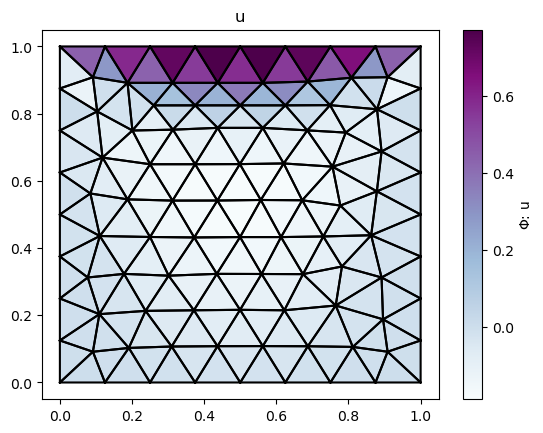

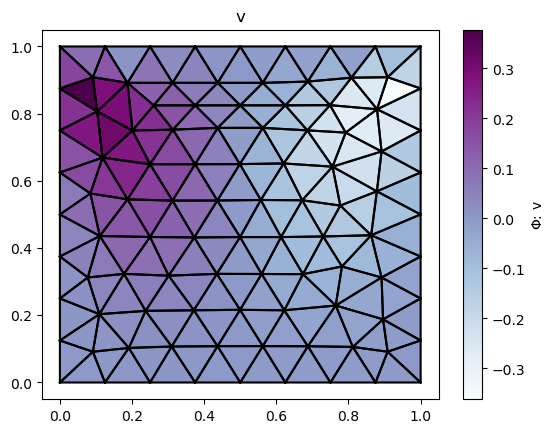

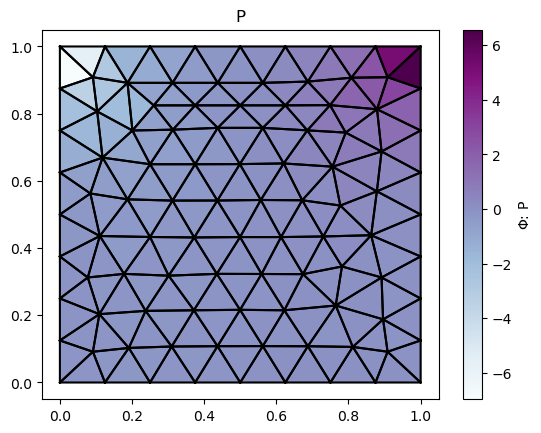

In [92]:
Post_Process(V_0[:,0],"u")
Post_Process(V_0[:,1],"v")
Post_Process(Psre_0,"P")